# Business Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

# Objectives

Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT.  The following approach is suggested :

 

- Start off with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis etc.

- Outlier Analysis: You must perform the Outlier Analysis on the dataset. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.

- Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]

- Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - **[gdpp, child_mort and income]** vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

- Also, you need to perform visualisations on the clusters that have been formed.  You can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. Make sure you create visualisations for all the three pairs. You can also choose other types of plots like boxplots, etc. 

- Both K-means and Hierarchical may give different results because of previous analysis (whether you chose to keep or remove the outliers, how many clusters you chose,  etc.) Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

## Data Dictionary


- **country:**	Name of the country
- **child_mort:**	Death of children under 5 years of age per 1000 live births
- **exports:**	Exports of goods and services per capita. Given as %age of the GDP per capita
- **health:**	Total health spending per capita. Given as %age of GDP per capita
- **imports:**	Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income:**	Net income per person
- **Inflation:**	The measurement of the annual growth rate of the Total GDP
- **life_expec:**	The average number of years a new born child would live if the current mortality patterns are to remain the same
- **total_fer:**	The number of children that would be born to each woman if the current age-fertility -rates remain the same
- **gdpp:**	The GDP per capita. Calculated as the Total GDP divided by the total population.


In [72]:
# Import required Libraries

# Import warning library to ignore warning
import warnings
warnings.filterwarnings('ignore')

# Import library for numeical calculation
import numpy as np

# Import library accessing Dataset 
import pandas as pd

# Import library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for modelling and scalling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import library for hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram

# Set display row and columns option
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)

## Importing and understanding Dataset

In [73]:
# Reading Dataset

# Dataset path: F:\Clustering_Assignment\Country-data.csv
country_df = pd.read_csv(r'F:\Clustering_Assignment\Country-data.csv')

# Displaying first 5 rows of data
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [74]:
# Checking shape (number of rows and columns) of dataset
country_df.shape

(167, 10)

- The dataset is having **`167` rows** and **`10` columns**

In [75]:
# Checking dataset summary (null, not null, row counts, datatypes etc.)
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- The dataset is having **7 float columns**, **2 integer columns** and one **object column**

In [76]:
# Checking statistical information (min, max, mean, median, percentiles etc.) of dataset

country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Column Name Renaiming

- Renaiming below columns for better interpretation
    - child_mort
    - life_expec
    - total_fer

In [77]:
# Renaiming below columns for better interpretation
country_df.rename(columns = {'child_mort': 'child mortality', 'life_expec': 'life expectancy', 'total_fer': 'total fertility'}, inplace = True)

# Reviewing data set (top 5 rows) after renaming column names
country_df.head()

,country,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Null value and Duplicate Analysis

In [78]:
# Checking null percentage enties in dataset columns

round(100*(country_df.isnull().sum()/len(country_df.index)),2)

country            0.0
child mortality    0.0
exports            0.0
health             0.0
imports            0.0
income             0.0
inflation          0.0
life expectancy    0.0
total fertility    0.0
gdpp               0.0
dtype: float64

- From the above result we can see there is **no null values** in any columns

In [79]:
# Duplicate row analysis in country dataset

country_df.duplicated(keep = 'first').sum()

0

- There is **no duplicate entries** found in any columns in the given dataset

In [80]:
# Checking for data redundancies in 'country' column like 'spelling'

country_df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

- There are **no redundant** entries exist in coluntry column

### Converting %Percentage value to actual values for below columns

- exports
- health
- imports

In [81]:
# Converting %Percentage value to actual values for 'exports', 'health' and 'imports' columns

# Forming list of columns to apply convertion rule
conv_cols = ['exports', 'health', 'imports']

# Applying convertion (%Percentahe to actual valur) on 'exports', 'health' and 'imports' columns
country_df[conv_cols] = country_df[conv_cols].apply(lambda x: (x/100)*country_df['gdpp'])

# Reviewing the dataset after convertion
country_df.head()

,country,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Exploratory Data Analysis (EDA)

- Univariate Analysys
- Bivariate Analysis

### Univariate Analysis:

#### Data Distribution

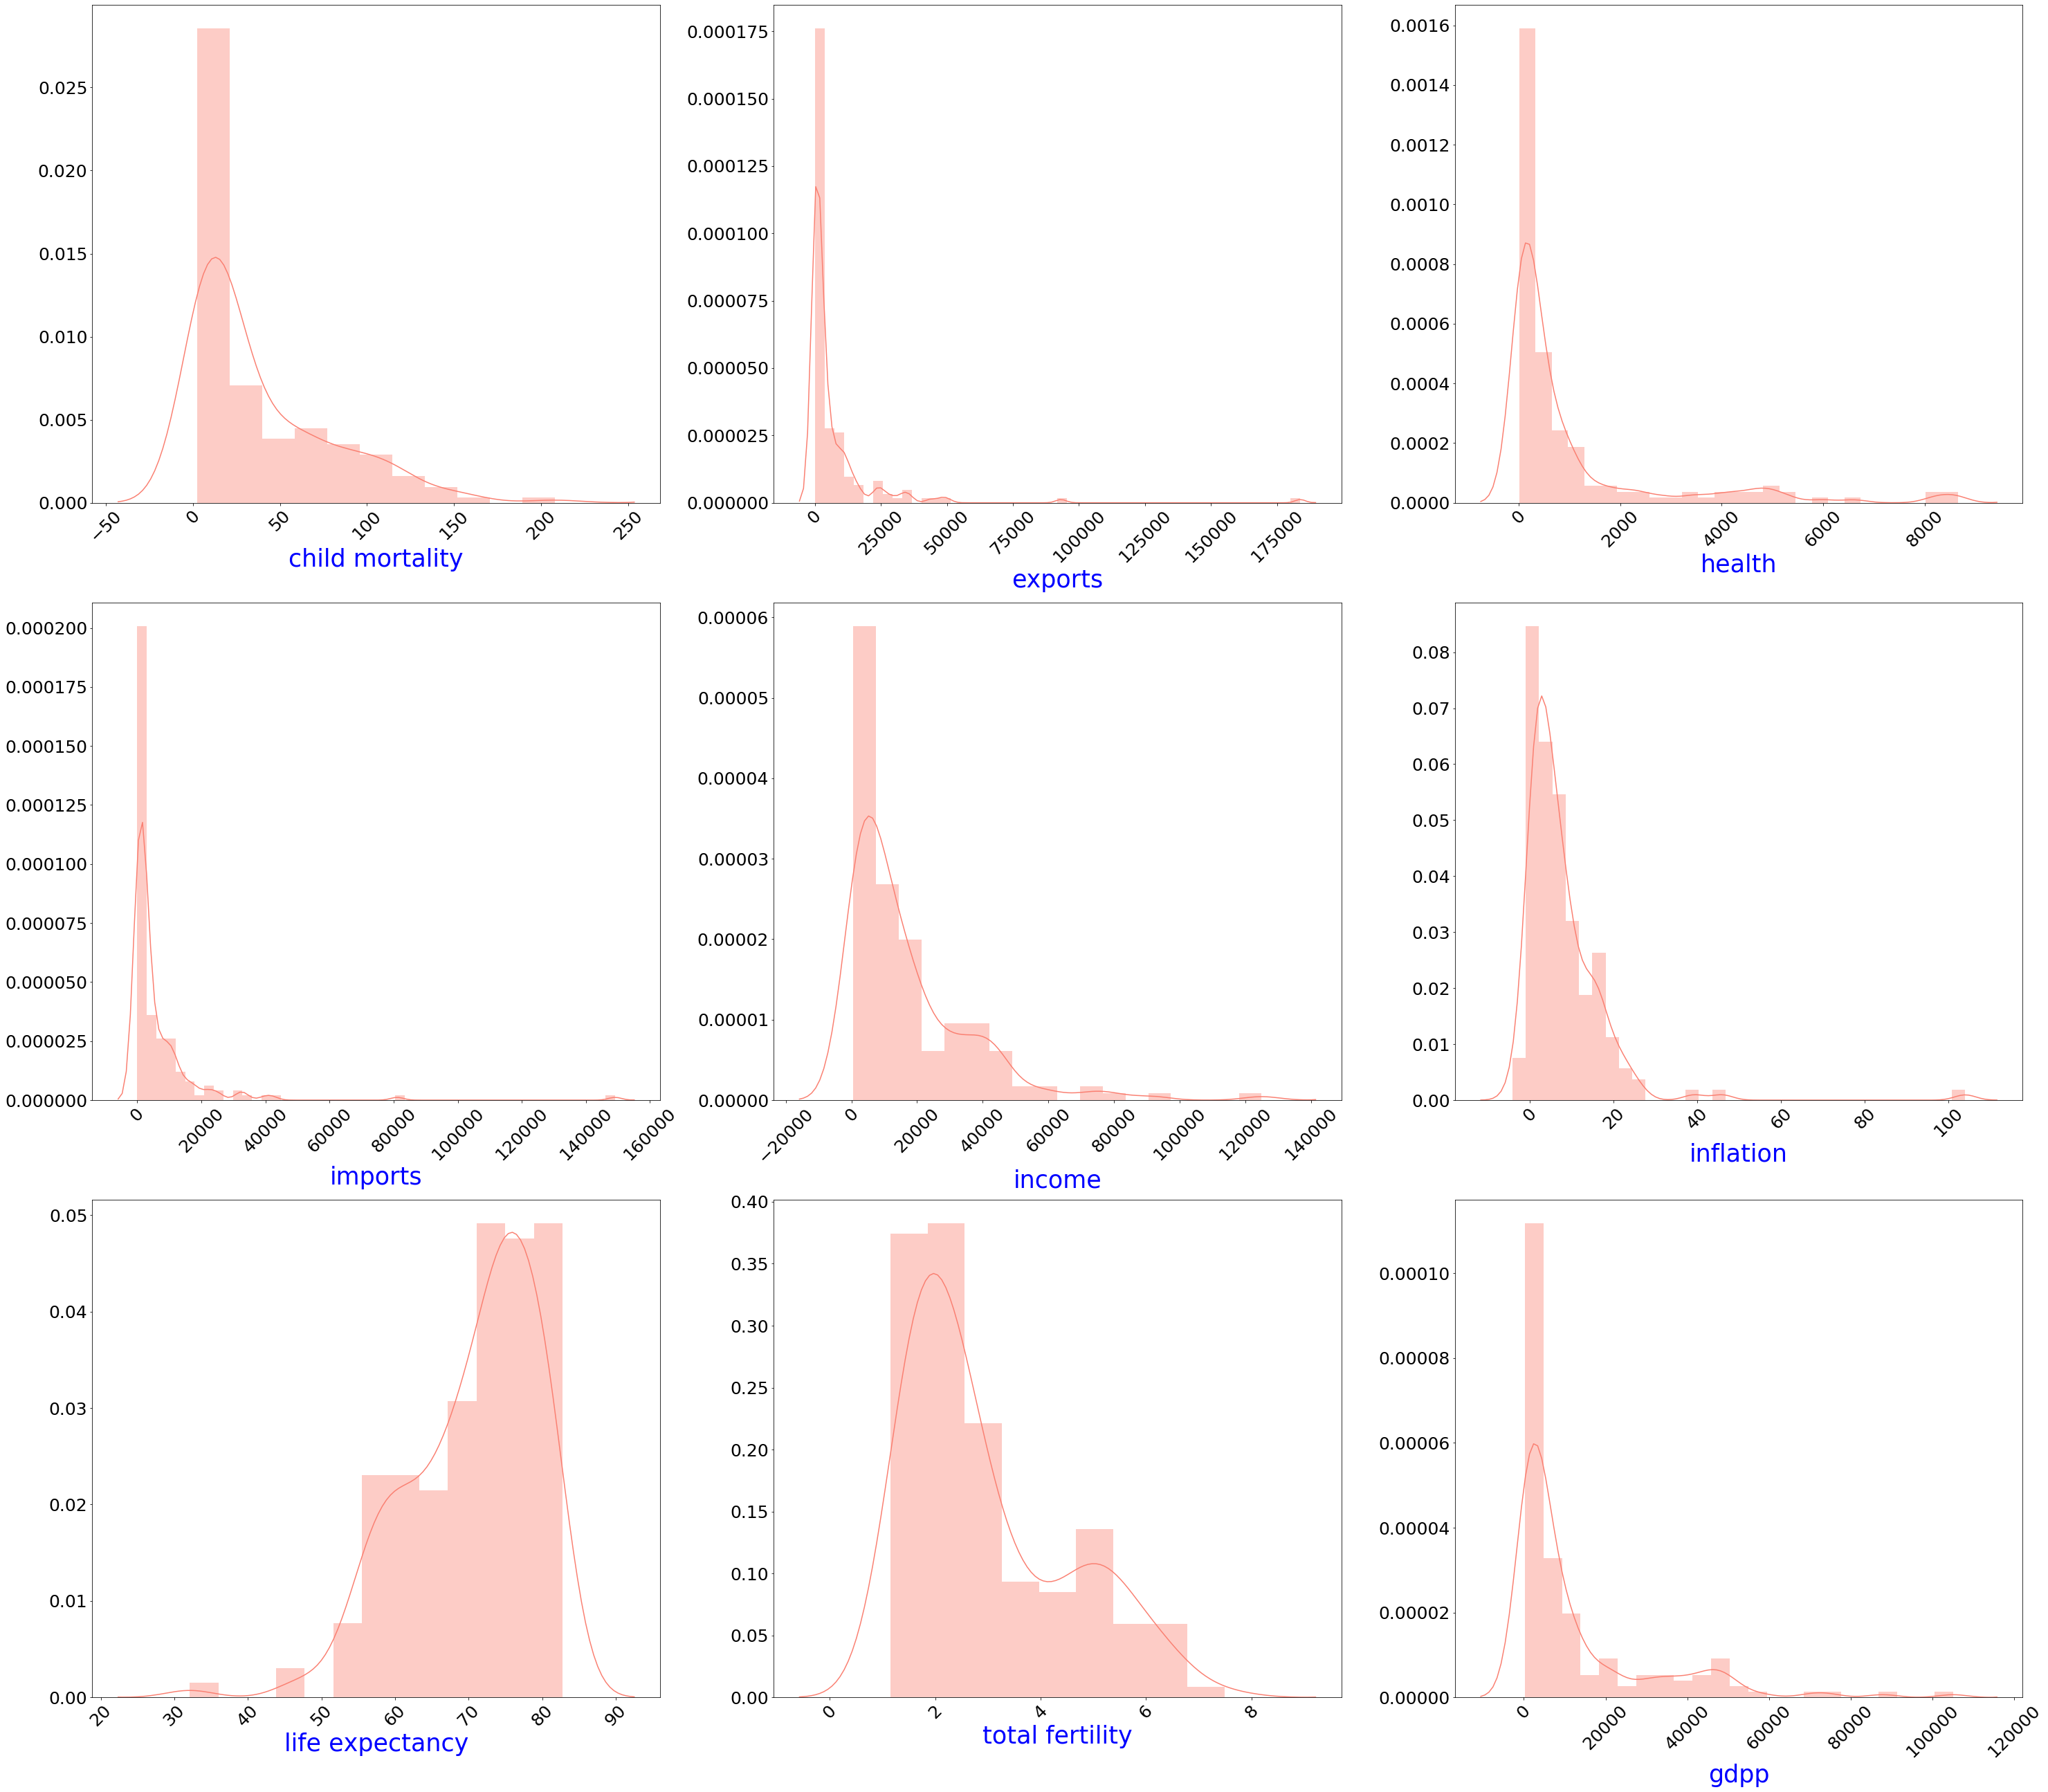

In [82]:
# Plotting Distribution of different numerical columns of different countries

# Setting the figure size for distplot
plt.figure(figsize = (50,45))

# Plotting distribution plot for numerical columns in a 3*3 subplot format
for col in enumerate(country_df.columns.drop('country',1)):
    
    # Setting subplot co-ordinate
    plt.subplot(3,3,col[0]+1)
    
    # Distribution plot using seaborn library
    sns.distplot(country_df[col[1]], color = 'salmon')
    
    # Setting X- axis and Y- axix display zize
    plt.xticks(fontsize = 25, rotation = 45)
    plt.yticks(fontsize = 25)
    
    # Setting axis labels
    plt.xlabel(col[1],fontsize = 35, color = 'blue')

# Displaying the plot using matplotlib.pyplot show() function
plt.show()

#### Inference:

- From the above plot we can see that none of the features are following normal distribution.
- We will get further insite from the above feature during further EDA and clustering analysis.

#### Outlier Analysis

In [83]:
# Custom function for box plot of different numerical columns

def outlier_check_func():

    # Setting the figure size for boxplot
    plt.figure(figsize = (30,28))
    
    # Plotting box plot for numerical columns in a 3*3 subplot format
    for col in enumerate(country_df.columns.drop('country',1)):
        
        # Setting subplot co-ordinate
        plt.subplot(3,3,col[0]+1)
        
        # Box plot using seaborn library
        sns.boxplot(country_df[col[1]])
        
        # Setting X- axis display zize
        plt.xticks(fontsize = 18, rotation = 45)
        
        # Setting axis labels
        plt.xlabel(col[1],fontsize = 25, color = 'blue')
    
    # Displaying the plot using matplotlib.pyplot show() function
    plt.show()

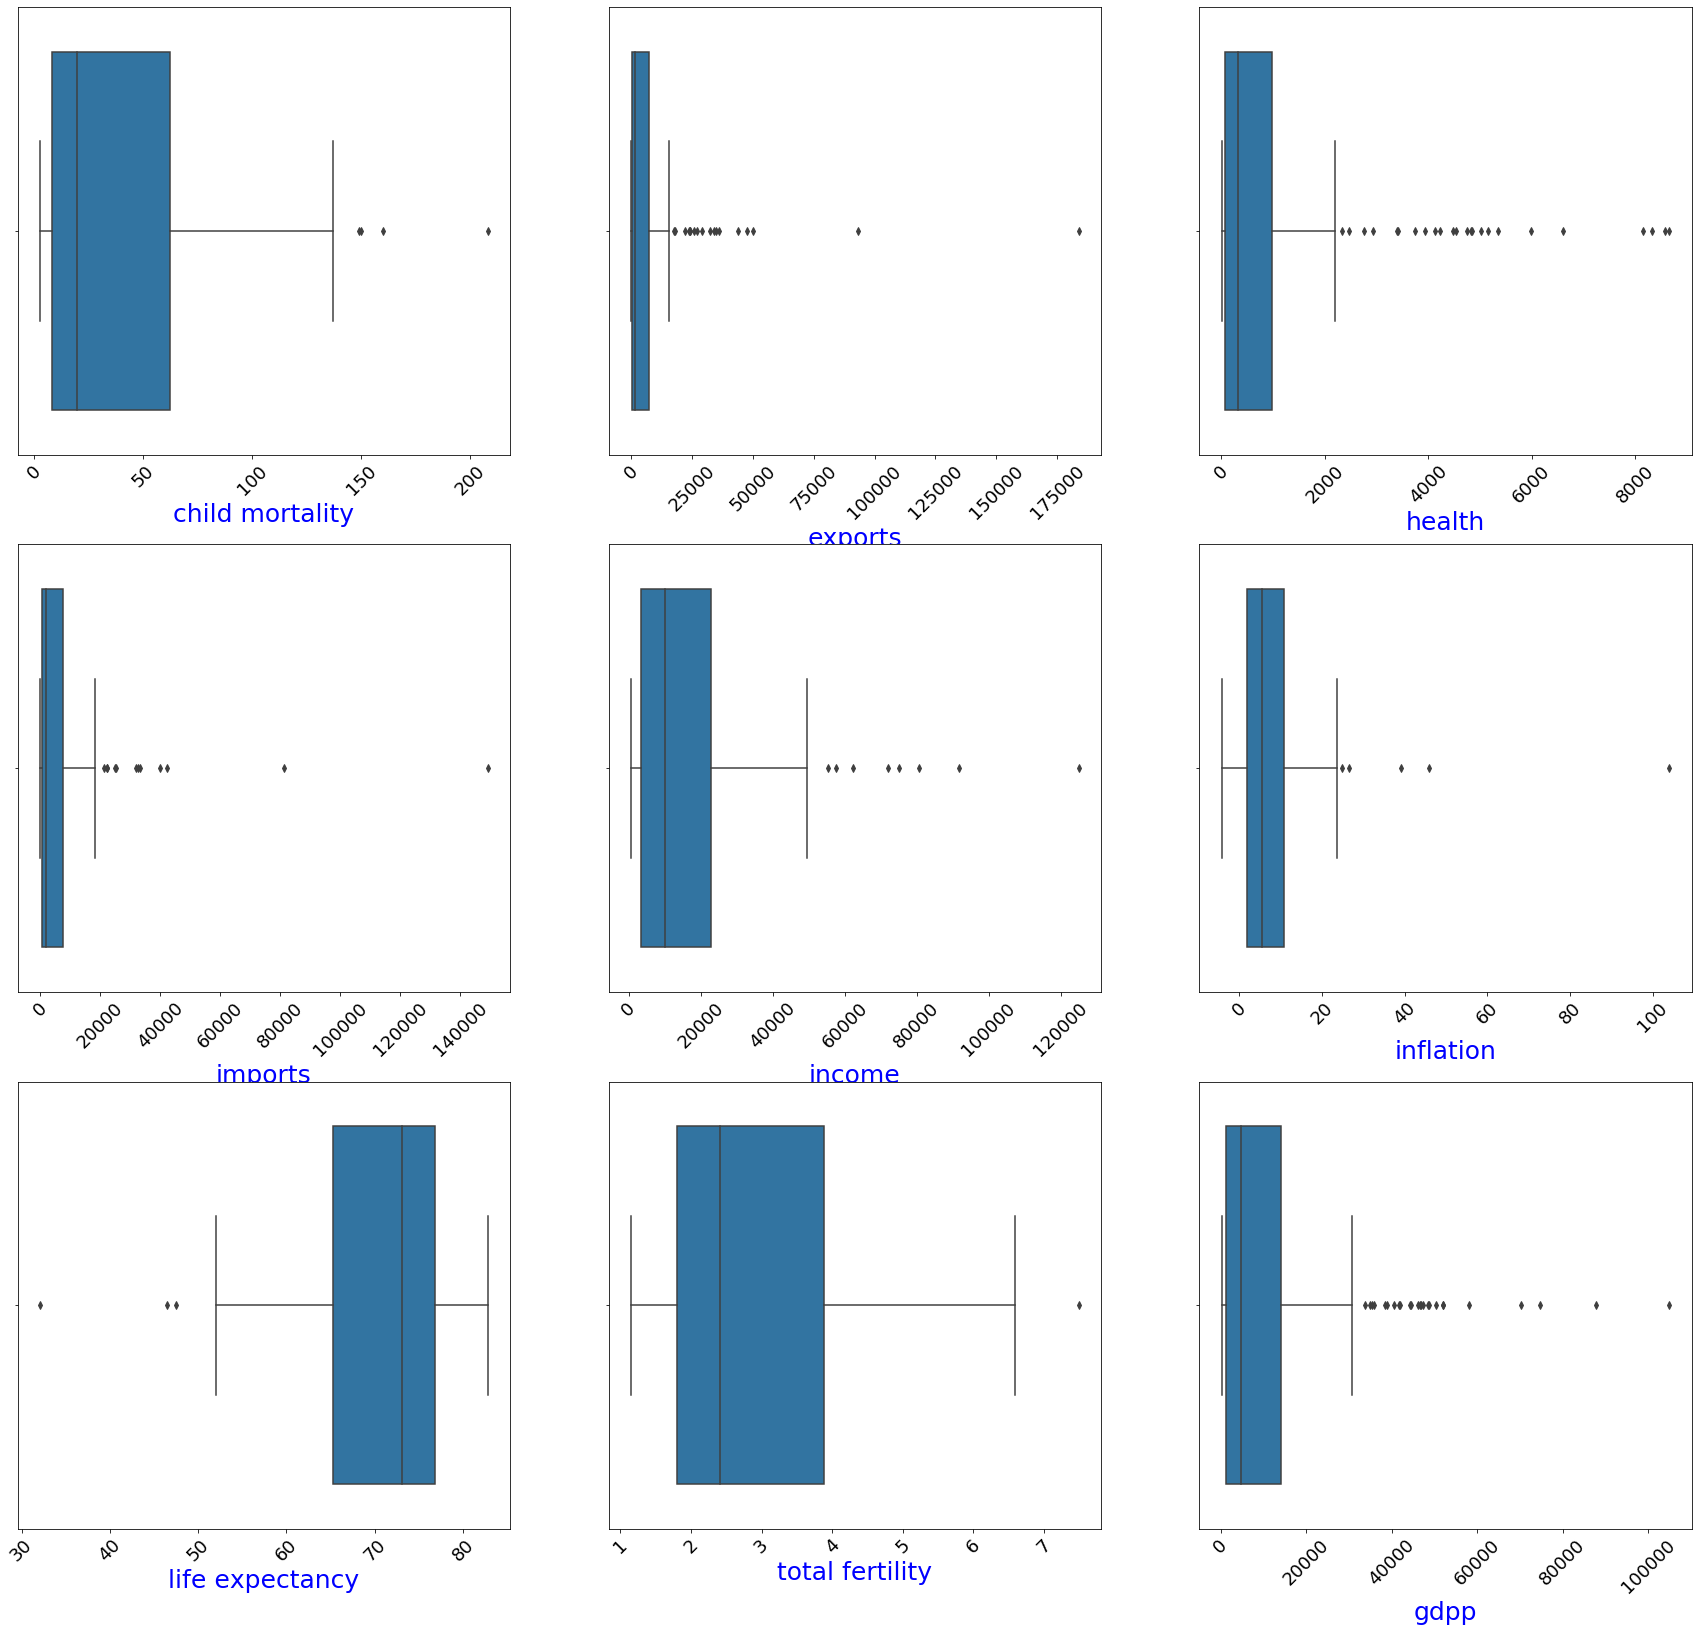

In [84]:
# Calling custom function for plotting box plot of different numerical columns of 
# different countries to identify outliers

outlier_check_func()

#### Inference:



- The **child mortality** rate, also under-five mortality rate, refers to the probability of dying between birth and exactly five years of age. From above box plot of child mortality column, we can see that few outliers exist above upper whisker (`95%` value). That means **for some countries the child mortality is extreme high and needs to be consider for aids. Hence, we will not perform any outlier tratement for this column.**


- The **inflation** column represents measurement of the annual growth rate of the GDP deflator. More precisely, it signifies a general increase in prices and fall in the purchasing value of money. From above box plot of inflation column, we can see that few outliers exist above upper whisker (`95%` value). That means **for some countries inflation is extreme high and needs to be consider for aids. Hence, we will not perform any outlier tratement for this column.**



- The **life expectancy** column signifies the average number of years a new born child would live. From above box plot of life expectancy column, we can see that few outliers exist below lower whisker (`5%` value). That means **for some countries life expectancy is extreme low and needs to be consider for aids. Hence, we will not perform any outlier tratement for this column.**



- **`Outlier Treatement:`** For rest of the columns like `imports`, `health`, `exports`, `income` etc., we can see that outliers exists above the upper whister (`95%` value). That means those countries do not need any aid. Hence, we will **perform outlier treatement** on those columns.

### Bivariate Analysis:

In [85]:
# Custom function for Bivariate Analysis

def bivariate_bar_plot(df, xcol, ycol, order):
    
    # Setting figure size
    plt.figure(figsize = (8,6))
    
    # top/ button 10 rows identification from dataframe
    topOrbottom_10_df = df.sort_values(by = ycol, ascending = order).head(10)
    
    # Plotting bae plot using seaborn library
    sns.barplot(x = xcol, y = ycol, data = topOrbottom_10_df)
    
    # Setting X- axis and y- axis display zize
    plt.xticks(fontsize = 13, rotation = 90)
    plt.yticks(fontsize = 13)
    
    # Setting axis labels
    plt.xlabel(xcol.title(),fontsize = 16, color = 'blue', labelpad = 20)
    plt.ylabel(ycol.title(),fontsize = 16, color = 'blue', labelpad = 20)
    
    # Setting title
    plt.title('Bar Graph: '+ xcol.title() + ' vs. '+ ycol.title(), fontsize = 16, color = 'blue', pad = 25)
    
    # Display plot using matplotlib.pyplot show() function
    plt.show()

#### country vs. child mortality (Top 10 countries)

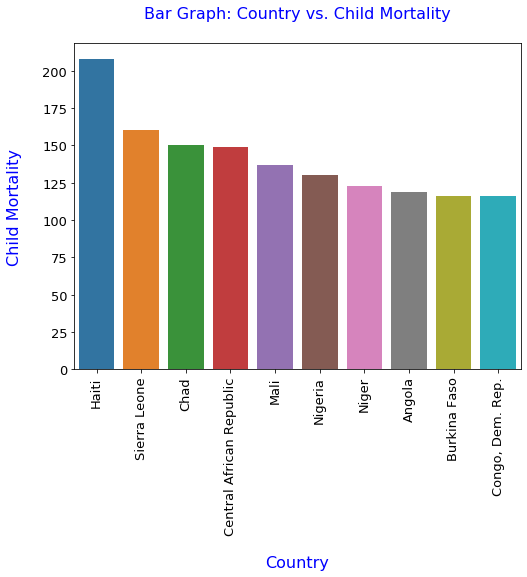

In [86]:
# Bivariate Analysis betwwen 'country' and 'child mortality' columns

# Calling custom function for plotting

bivariate_bar_plot(country_df, 'country', 'child mortality', False)

#### Inference:

- From the above bar plot between `Country vs. Child Mortality`, we can see that country **Haiti**, situated in continent North America has the `highest child mortality rate` followed by **Sierra Leone**, **Chad**, **Central African Republic**, **Mali**.


- Hence, based on child mortality rate, we can say that `these top 5 countries can be considered for HELP International NGO aid`.

#### country vs. inflation (Top 10 countries)

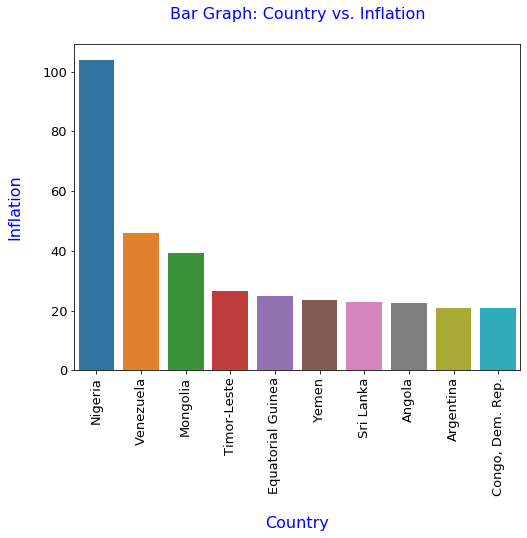

In [87]:
# Bivariate Analysis betwwen 'country' and 'inflation' columns

# Calling custom function for plotting

bivariate_bar_plot(country_df, 'country', 'inflation', False)

#### Inference:

- From the above bar plot between `Country vs. Inflation`, we can see that country **Nigeria**, situated in continent Africa has the `highest inflation` followed by **Venezuela**, **Mongolia**, **Timor-Leste**, **Equatorial Guinea**.


- Hence, based on inflation, we can say that `these top 5 countries can be considered for HELP International NGO aid`.

#### country vs. life expectancy (Least 10 countries)

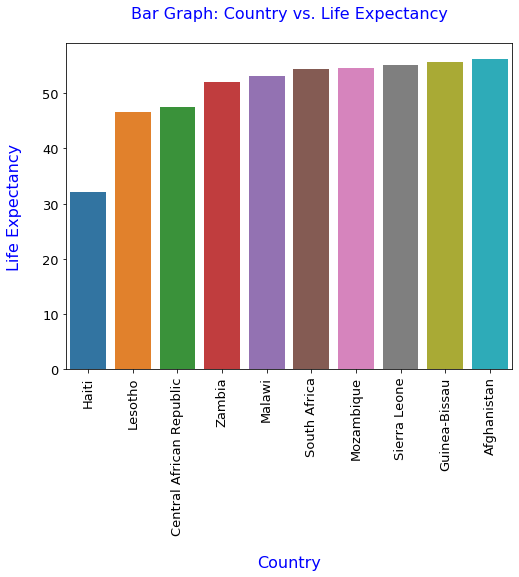

In [88]:
# Bivariate Analysis betwwen 'country' and 'life expectancy' columns

# Calling custom function for plotting

bivariate_bar_plot(country_df, 'country', 'life expectancy', True)

#### Inference:

- From the above bar plot between `Country vs. Life Expectancy`, we can see that country **Haiti**, situated in continent North America has the `lowest life expectancy` followed by **Lesotho**, **Central African Republic**, **Zambia**, **Malawi**.


- From the `Country vs. Child Mortality` bar plot, we already saw that country **Haiti** has the `highest child mortality rate`. So, **Haiti** can strongly be considered for NGO aid.


- Hence, based on Life expectancy, we can say that `these least 5 countries can be considered for HELP International NGO aid`.

#### country vs. exports (Least 10 countries)

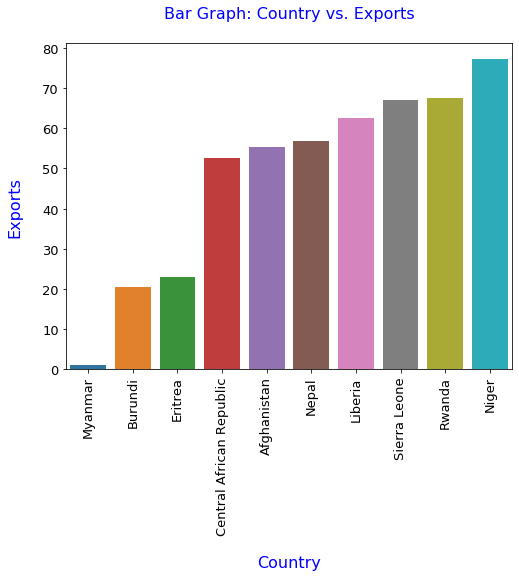

In [89]:
# Bivariate Analysis betwwen 'country' and 'exports' columns

# Calling custom function for plotting

bivariate_bar_plot(country_df, 'country', 'exports', True)

#### Inference:

- From the above bar plot between `Country vs. Exports`, we can see that country **Myanmar**, situated in continent Asia has the `lowest exports of goods and services` followed by **Burundi**, **Eritrea**, **Central African Republic**, **Afghanistan**.


- Hence, based on exports, we can say that `these least 5 countries can be considered for HELP International NGO aid`.

#### country vs. health (Least 10 countries)

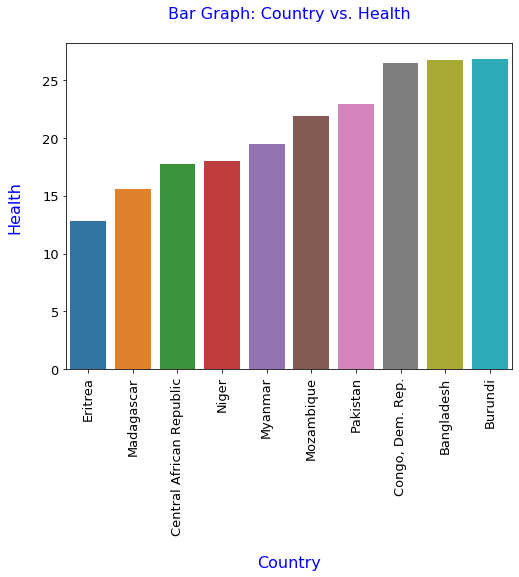

In [90]:
# Bivariate Analysis betwwen 'country' and 'health' columns

# Calling custom function for plotting

bivariate_bar_plot(country_df, 'country', 'health', True)

#### Inference:

- From the above bar plot between `Country vs. Health`, we can see that country **Eritrea**, situated in continent Africa spend `lowest amount on health` followed by **Madagascar**, **Central African Republic**, **Niger**, **Myanmar**.


- From the `Country vs. Exports` bar plot, we already saw that country **Myanmar** has the `lowest exports of goods and services`. So, **Myanmar** can strongly be considered for NGO aid.


- Hence, based on Health spend, we can say that `these least 5 countries can be considered for HELP International NGO aid`.

#### country vs. imports (Least 10 countries)

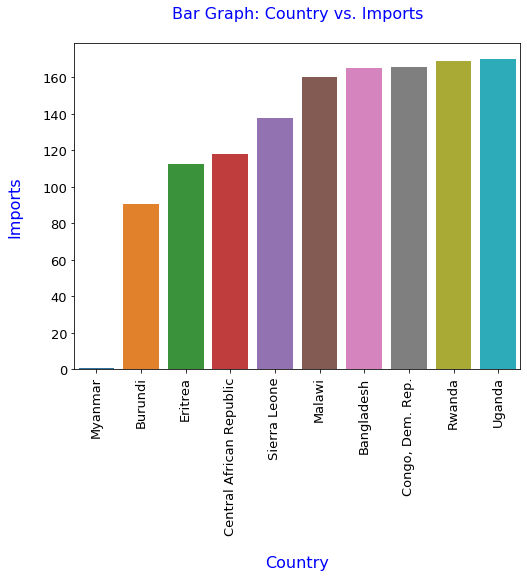

In [91]:
# Bivariate Analysis betwwen 'country' and 'imports' columns

# Calling custom function for plotting

bivariate_bar_plot(country_df, 'country', 'imports', True)

#### Inference:

- From the above bar plot between `Country vs. Imports`, we can see that country **Myanmar**, situated in continent Asia has `lowest imports of goods and services` followed by **Burundi**, **Eritrea**, **Central African Republic**, **Sierra Leone**.


- From the `Country vs. Exports` and `Country vs. Health` bar plots, we already saw that country **Myanmar** has the `lowest exports of goods and services` as well as it `spends low on health`. So, **Myanmar** can strongly be considered for NGO aid.


- Hence, based on Imports spend, we can say that `these least 5 countries can be considered for HELP International NGO aid`.

#### country vs. income (Least 10 countries)

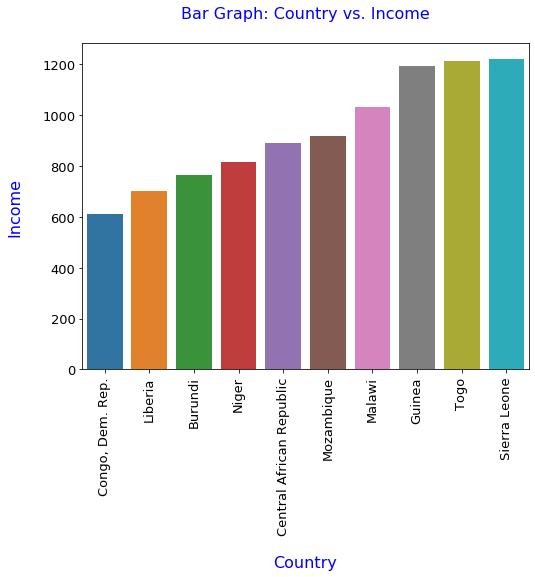

In [92]:
# Bivariate Analysis betwwen 'country' and 'income' columns

# Calling custom function for plotting

bivariate_bar_plot(country_df, 'country', 'income', True)

#### Inference:

- From the above bar plot between `Country vs. Income`, we can see that country **Congo, Dem. Rep.**, situated in continent Africa has `lowest net income per person` followed by **Liberia**, **Burundi**, **Niger**, **Central African Republic**.


- Hence, based on income per person, we can say that `these least 5 countries can be considered for HELP International NGO aid`.

#### country vs. total fertility (Top 10 countries)

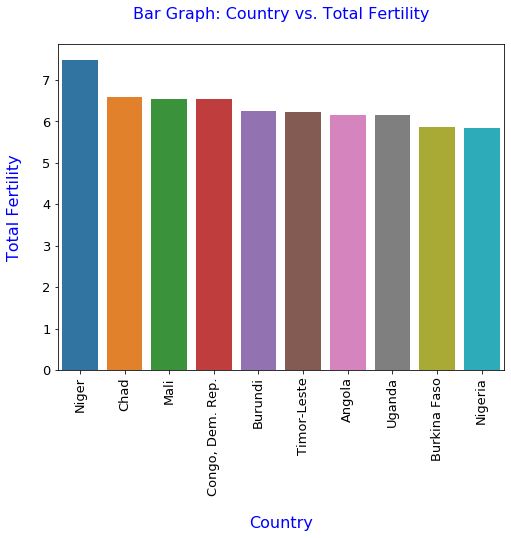

In [93]:
# Bivariate Analysis betwwen 'country' and 'total fertility' columns

# Calling custom function for plotting

bivariate_bar_plot(country_df, 'country', 'total fertility', False)

#### Inference:

- From the above bar plot between `Country vs. Total Fertility`, we can see that country **Niger**, situated in continent Africa has `highest fertility rate` followed by **Chad**, **Mali**, **Congo, Dem. Rep.**, **Burundi**.


- From the `Country vs. Income` and `Country vs. Health` bar plots, we already saw that country **Niger** has the `low income per person` as well as it `spends low on health`. So, **Niger** can strongly be considered for NGO aid.


- Hence, based on total fertility rate, we can say that `these top 5 countries can be considered for HELP International NGO aid`.

#### country vs. gdpp (Least 10 countries)

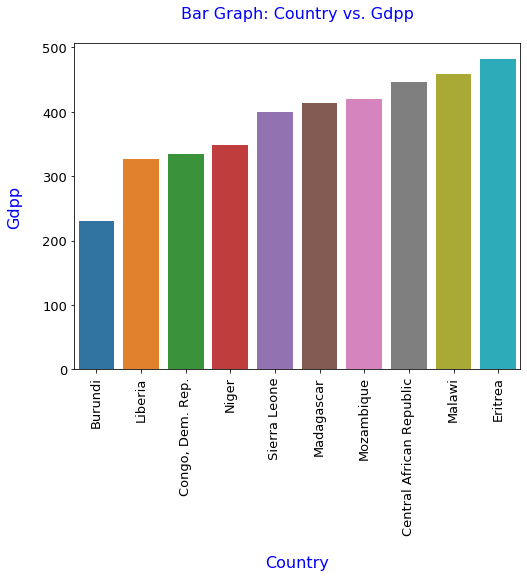

In [94]:
# Bivariate Analysis betwwen 'country' and 'gdpp' columns

# Calling custom function for plotting

bivariate_bar_plot(country_df, 'country', 'gdpp', True)

#### Inference:

- From the above bar plot between `Country vs. Gdpp`, we can see that country **Burundi**, situated in continent Africa has `lowest gdpp per capita` followed by **Liberia**, **Congo, Dem. Rep.**, **Niger**, **Sierra Leone**.


- From the `Country vs. Total Income` , `Country vs. Imports`, `Country vs. Exports`, `Country vs. Total Fertility` bar plots, we already saw that country **Burundi** has the `low income per person` and it has `low imports and exports of goods and services`, as well as, having `high fertility rate`. So, **Burundi** can strongly be considered for NGO aid.


- Hence, based on gdpp per capita, we can say that `these least 5 countries can be considered for HELP International NGO aid`.

- From the above **Bivariate analysis**, we can conclude that, **African countries** `can be considered mostly for NGO aid`.

- We will further study these trends in **Clustering**.

#### Pair Plot between all Numerical features

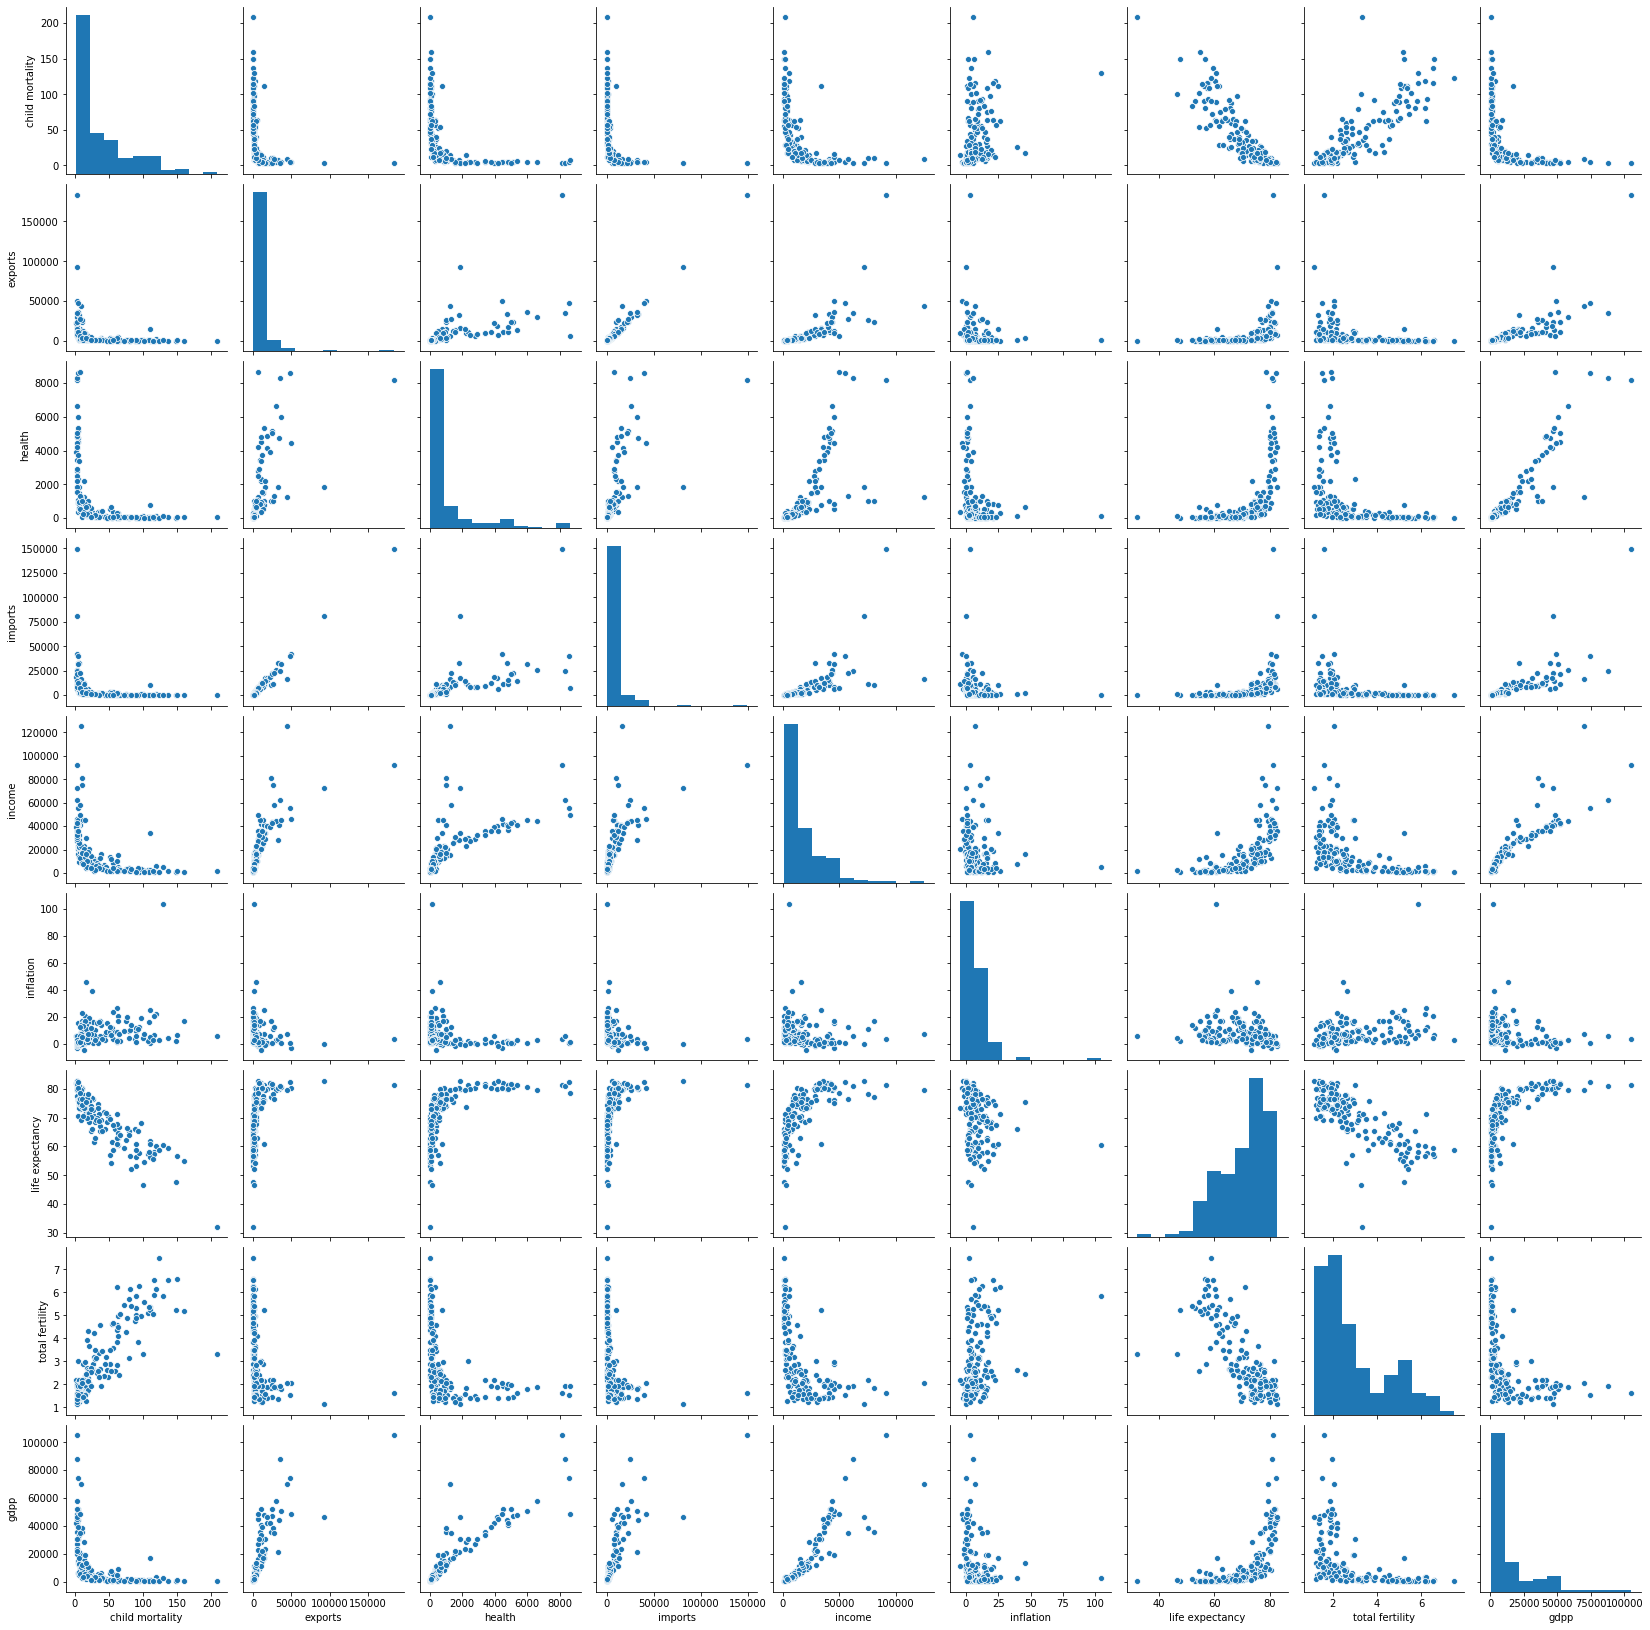

In [95]:
# Pair plot between all numerical columns using seaborn library

sns.pairplot(country_df)

# Display plot using matplotlib.pyplot show() function
plt.show()


#### Inference:

- Though Pairplot is not required for clustering as parameter correlation is not an issue for clustering model, I have performed the analysis just to understand the features better. 


- These plot provides understanding of how each feature impacts another which inturn will be critical when taking decisions for top countries to be considered for NGO aids.

## Data Preparation

- Outlier treatement
- Scalling

### Outlier treatement 

In [96]:
# Perform outlier treatement on below columns

treat_cols=['exports','health','imports','income', 'total fertility', 'gdpp']

# Performing Soft capping at 99% quantile for upper end outliers

# Looping through columns to be treated
for out_col in treat_cols:
    
    # Fetching 99% quantile value
    upper_cap = country_df[out_col].quantile(0.99)
    
    # Perform soft capping to assign column values to its 99% value, when value is >= 99%
    country_df[out_col][country_df[out_col] >= upper_cap] = upper_cap

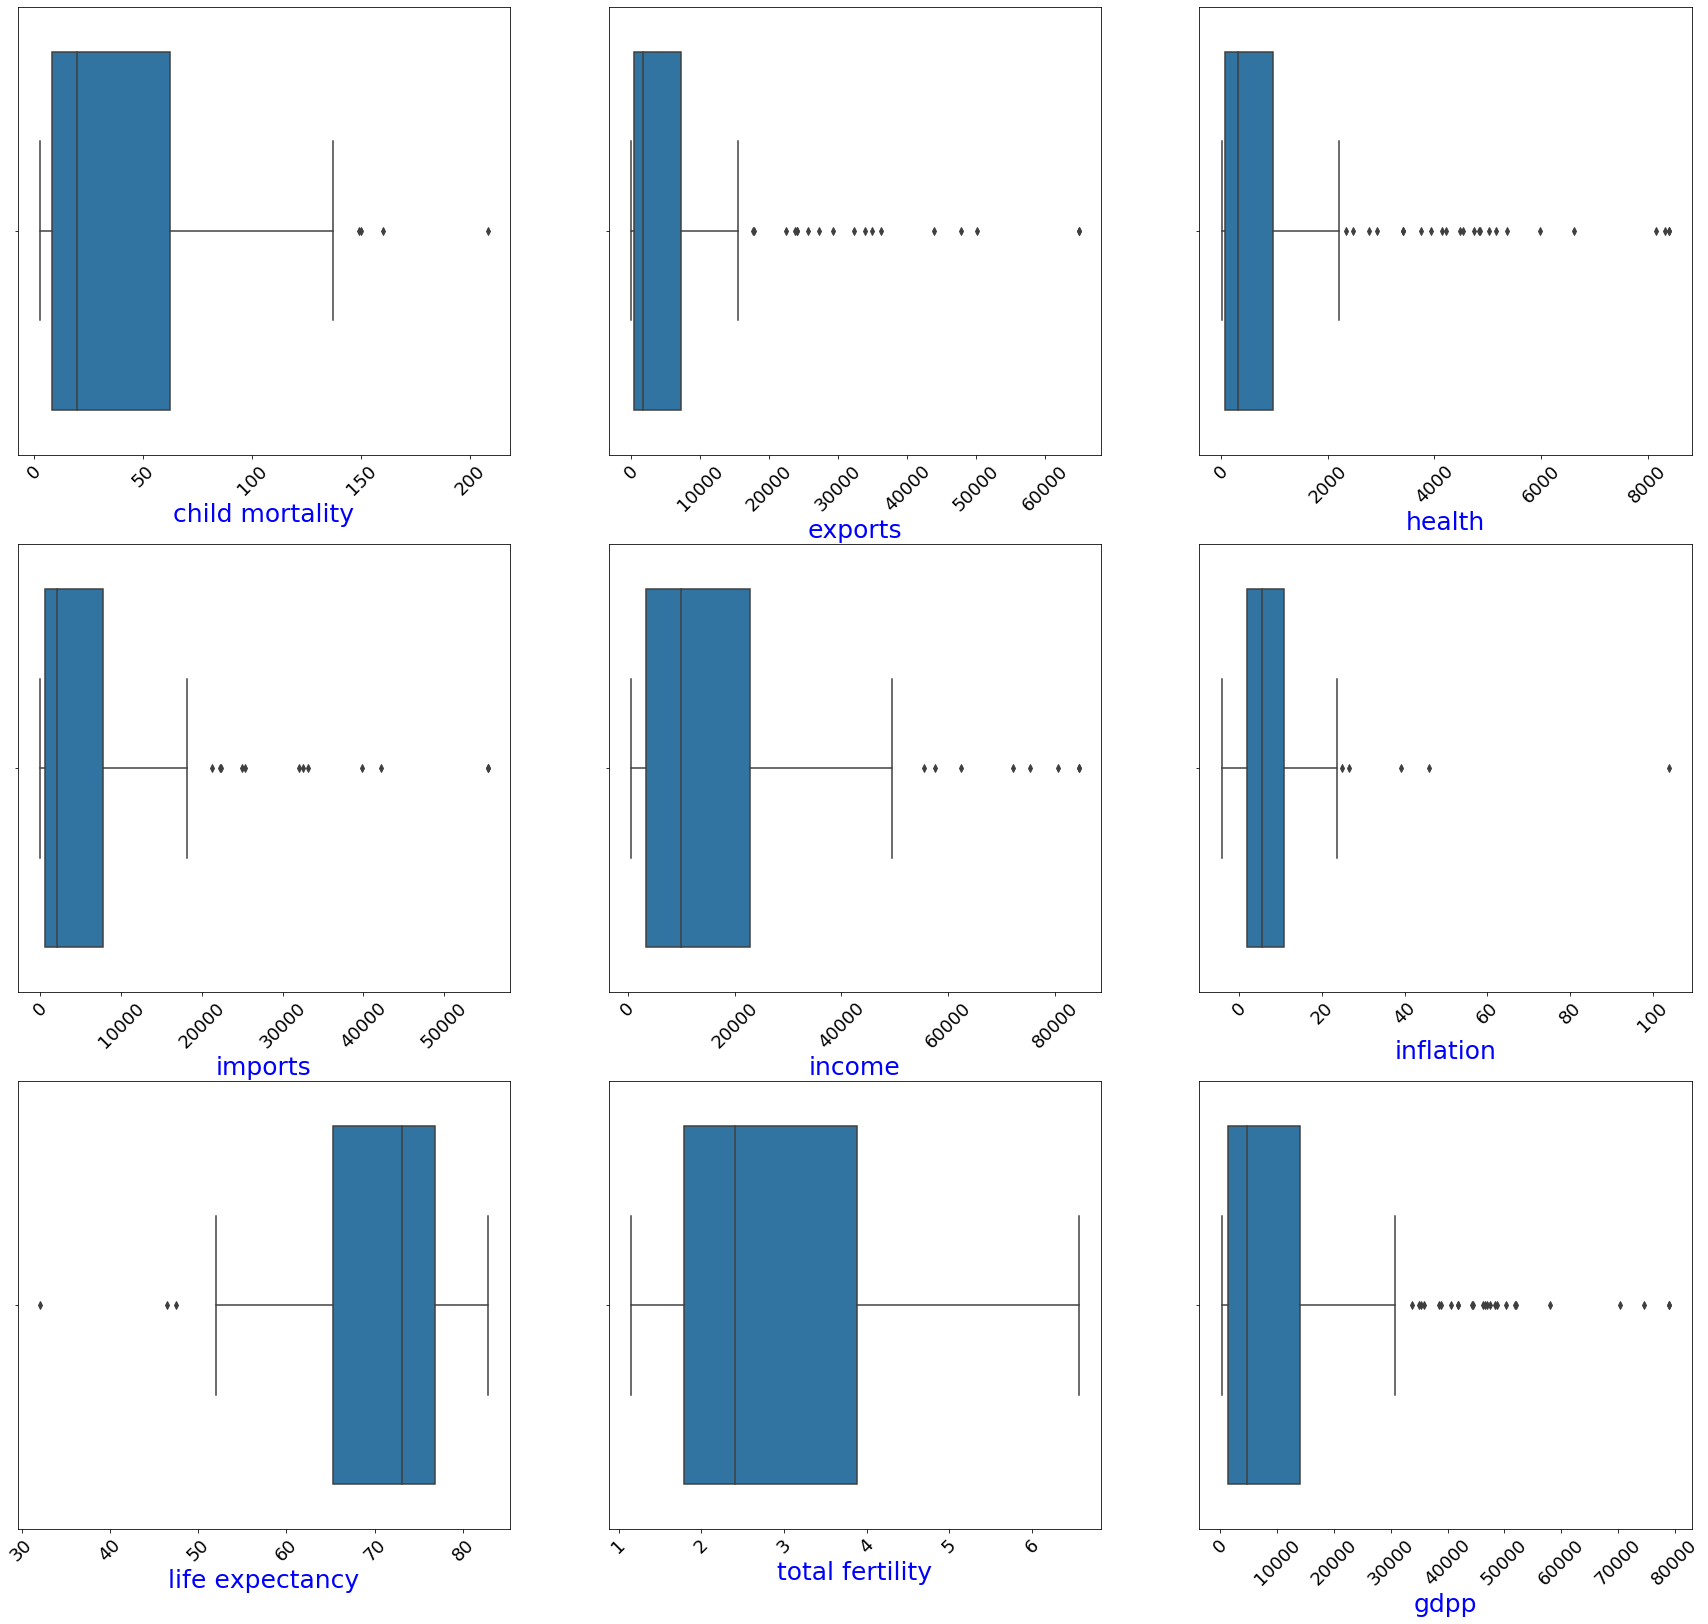

In [97]:
# Calling custom function for checking outliers after performing outlier treatement
outlier_check_func()

#### Inference:



- For outlier treatement we have performed soft capping ( basically capped the extreme outliers within 99% of the features value).


- After the outlier treatement we can see the there are still outliers present but we will ignore them beacuse as there are lot of outliers present for different features , hence these data points could form the cluster among them during clustering.


- **`Outlier Untreated:`** For the columns like `child mortality`, `inflation`, `life expectancy`, we can see that outliers exists above the upper whister (`95%` value).We will not **perform outlier treatement** on those columns as already mentioned because these are the columns which can be considered or features based on which a country can be consider for NGO aids.


- **`Outlier Treated:`** For rest of the columns like `imports`, `health`, `exports`, `income` etc., we can see that outliers exists above the upper whister (`95%` value). That means those countries do not need any aid. Hence, we will **perform outlier treatement** on those columns.

### Scalling the DataFrame

In [98]:
# Creating new dataframe with columns need to be scalled

scalled_df = country_df.drop('country', axis = 1)

# Displaying top 5 rows of new dataframe (without country column)
scalled_df.head()

,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [99]:
# Initializing StandardScaler
scaler = StandardScaler()

# Applying scalling on new dataframe and store the scalled data into same dataframe 'scalled_df'
scalled_df[:] = scaler.fit_transform(scalled_df)

# Displaying top 5 rows of new dataframe after performing scalling
scalled_df.head()

,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042


## Perform Clustering

- Cluster Tendency Check
    - Check **Hopkins Statistics**



- Perform clustering using **K-Means**

    - Run K-Means and choose K using both `Elbow` and `Silhouette score`
    - Run K-Means with the chosen K
    - Visualize the clusters
    - Clustering profiling using `gdpp`, `child mortality` and `income` columns
    - Clustering profiling using **some socio-economic and health factors** like `health`, `imports`, `exports`, `inflation`
    -  **Country Identification:**  Based on the analysis, choose the countries that are in need for the aid.




- Perform clustering using **Hierarchical Clustering**
    - Use both Single and Complete linkage
    - Choose one method based on the results
    - Visualise the clusters
    - Clustering profiling using `gdpp`, `child mortality` and `income` columns
    - Clustering profiling using **some socio-economic and health factors** like `health`, `imports`, `exports`, `inflation`
    - **Country Identification:** Choose the countries based on some socio-economic and health factors.
    


### Cluster Tendency Check

In [100]:
# Cluster tendency check using Hopkin statistic

# Import required library

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# Creating custom function for checking cluster tendency for Hopkins
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0, n, 1), m)
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
# sum of the distace from its nearest neighbour of actual dataset / sum of the distace from its nearest neighbour of actual dataset and random dataset 
# A value close to 1 tends to indicate the data is highly clustered
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
        
# Return the hopkins statistic
    return H

In [101]:
# Calling custom function for Hopkins check

for iteration in range(1,6):
    print(str(iteration)+'. Hopkins Statistics: ', hopkins(scalled_df))

1. Hopkins Statistics:  0.8868180412637673
2. Hopkins Statistics:  0.9197546056731967
3. Hopkins Statistics:  0.9228166679817202
4. Hopkins Statistics:  0.9084106727464286
5. Hopkins Statistics:  0.9003319618491624


#### Inference:


- We have performed Hopkins check multiple times, to confirm that each time the Hopkins statistics value comes nearly 1. **A value close to 1, indicates the data is highly clustered.**


- In our case, as the Hopkins statistics values came close to 1 each time. It confirmed that our dataset is having **high clusterd tendency.**

### Perform K-Means Clustering

#### Run K-Means and choose K using  `Elbow`

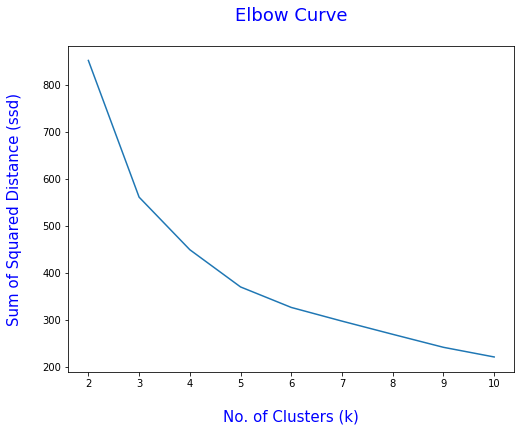

In [102]:
# Plotting Elbow curve to choose optimul number of cluster(k)

# Setting figure size for plot
plt.figure(figsize = (8,6))

# Creating empty list to store cost function: sum of squared(ssd) value
ssd = []

# Creating a list with cluster(k) range (2 to 10) 
cluster_range = list(range(2,11))

# Looping through each cluster(k) value and calculate cost function ssd 
for k in cluster_range:
    
    # Initialize object for KMeans class and call fit method 
    kmean = KMeans(n_clusters=k, max_iter=50, random_state=0).fit(scalled_df)
    
    # Storing the cost function in ssd list
    ssd.append(kmean.inertia_)
    
# Plotting the Elbow Curve: clusters(k) vs. cost function(ssd)
plt.plot(cluster_range, ssd)

# Setting axis labels
plt.xlabel('No. of Clusters (k)',fontsize = 15, color = 'blue', labelpad = 20)
plt.ylabel('Sum of Squared Distance (ssd)',fontsize = 15, color = 'blue', labelpad = 20)

# Setting title
plt.title('Elbow Curve', fontsize = 18, color = 'blue', pad = 25)

# Display plot using matplotlib.pyplot show() function
plt.show()

#### Inference:


- Calculate the Within-Cluster-Sum of Squared Errors (ssd) for different values of k and choose the k for which ssd becomes first starts to diminish. So, the point where this distortion declines the most is the elbow point.


- From the above curve the **elbow point** will be at **k = 3**, because at that point, distortion declines the most.

#### Run K-Means and choose K using  `Silhouette score`

- **silhouette score** = `(p−q)/ max(p,q)`
    - p is the mean distance to the points in the nearest cluster that the data point is not a part of
    - q is the mean intra-cluster distance to all the points in its own cluster.



- The value of the silhouette score range lies between -1 to 1.
    - A score closer to `1` indicates that the `data point is very similar to other data points` in the cluster
    - A score closer to `-1` indicates that the `data point is not similar to the data points` in its cluster.


------------------------------------------------------------
Silhouette score for cluster(k) = 2 is:  0.4785537433954376
Silhouette score for cluster(k) = 3 is:  0.42330733362616313
Silhouette score for cluster(k) = 4 is:  0.4091396796207265
Silhouette score for cluster(k) = 5 is:  0.4155820343491549
Silhouette score for cluster(k) = 6 is:  0.3168594752023034
Silhouette score for cluster(k) = 7 is:  0.32207892145576
Silhouette score for cluster(k) = 8 is:  0.2610730768708743
Silhouette score for cluster(k) = 9 is:  0.30413758296141935
Silhouette score for cluster(k) = 10 is:  0.2958116533517011
------------------------------------------------------------



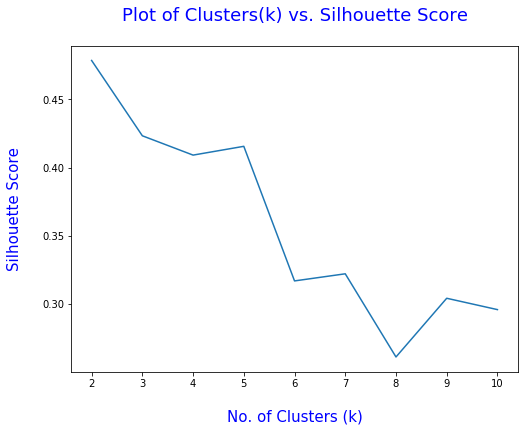

In [103]:
# Plotting Silhouette score to choose optimul number of cluster(k)

# Setting figure size for plot
plt.figure(figsize = (8,6))

# Creating empty list to store Silhouette_score values for different clusters(K)
Silhouette_score = []

# Creating a list with cluster(k) range (2 to 10) 
cluster_range = list(range(2,11))

# Formatting the output
print('')
print('------------------------------------------------------------')

# Looping through each cluster(k) value and calculate Silhouette score
for k in cluster_range:
    
    # Initialize object for KMeans class and call fit method 
    kmean = KMeans(n_clusters=k, max_iter=50, random_state=0).fit(scalled_df)
    
    # Calculating average Silhouette score for cluster value of k
    avg_silhouetteScore = silhouette_score(scalled_df, kmean.labels_)
    
    # Print the Silhouette score for cluster value of k
    print('Silhouette score for cluster(k) = ' + str(k) + ' is: ', avg_silhouetteScore)

    # Storing the cost function in ssd list
    Silhouette_score.append(avg_silhouetteScore)

# Formatting the output
print('------------------------------------------------------------')
print('')

# Plotting the Silhouette_score : clusters(k) vs. Silhouette score
plt.plot(cluster_range, Silhouette_score)

# Setting axis labels
plt.xlabel('No. of Clusters (k)',fontsize = 15, color = 'blue', labelpad = 20)
plt.ylabel('Silhouette Score',fontsize = 15, color = 'blue', labelpad = 20)

# Setting title
plt.title('Plot of Clusters(k) vs. Silhouette Score', fontsize = 18, color = 'blue', pad = 25)

# Display plot using matplotlib.pyplot show() function
plt.show()

#### Inference:


- We know that, a score closer to `1` indicates that the `data point is very similar to other data points` in the cluster. In our plot, the Silhouette score value is closer to 1, for k = 2. But for business, **k = 2** is not a good number of clusters to work on.


 - Hence, from `Silhouette score curve`, we will consider **k = 3** as the optimum cluster number.
 

#### Chosen K value:

- Considering both `Elbow curve and Silhouette score`, we observe that `optimul value of k can be 3`. Thus, **we will perform clustering with k = 3**

#### Run K-Means with the chosen K (K = 3)

In [104]:
# Performing KMeans clustering with cluster K = 3

# Initialize the KMeans with cluster number 3
kmeans = KMeans(n_clusters = 3, max_iter = 50, random_state = 0)

# Using fit method fit the clusters on scalled dataframe
kmeans.fit(scalled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [105]:
# Displaying the cluster labels generated with K = 3
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [106]:
# Adding the cluster labels with the original DataFrame

country_df['Cluster_label'] = kmeans.labels_

# Displaying top 5 rows of original DataFrame after adding cluster label column
country_df.head()

,country,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp,Cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


#### Check Data Distribution among Clusters

In [107]:
# Custom function to check the number of Data Points in each cluster

def datapoint_distribution():
    
    # Checking value counts in each cluster
    print("---------------------------------")
    print(country_df.Cluster_label.value_counts())
    print("---------------------------------")
    print('')
    
    
    # Using pie plot
    
    # Taking the percentage of data points in each clusters
    cluster_percentage = country_df.Cluster_label.value_counts(normalize = True)
    
    # Formating the pie plot
    plt.figure(figsize=(12,5))
    plt.title("Proportion of data in Clusters",color='blue',fontsize=15)
    
    # Ploting the piew plot
    
    plt.pie(cluster_percentage,labels=cluster_percentage.index,autopct='%1.2f%%',colors=['green','red','yellow'])
    
    # Showing the pie plot using matplotlib.pyplot show() function
    
    plt.show()

---------------------------------
2    92
0    48
1    27
Name: Cluster_label, dtype: int64
---------------------------------



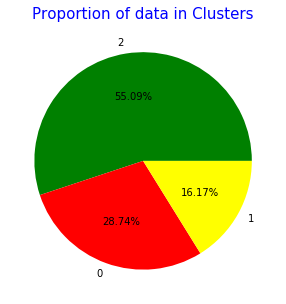

In [108]:
# Calling custom function to check the number of Data Points in each cluster

datapoint_distribution()

- `Data distribution seems goods among three clusters`. Hence, we can proceed with visualization and Cluster profiling

#### Visualize the clusters

- Plotting the cluster with respect to the data columns

    - Child Mortality
    - GDPP
    - Income


In [109]:
# Custom function for plotting the cluster with respect to data columns

def visualise_cluster(x_col, y_col):
    
    # Setting figure size for plot
    plt.figure(figsize = (8,6))
    
    # Scatter plot using seaborn library
    sns.scatterplot(country_df[x_col], country_df[y_col], hue = country_df['Cluster_label'], palette ='Set1', s = 100)
    
    # Setting axis labels
    plt.xlabel(x_col.title(),fontsize = 15, color = 'blue', labelpad = 20)
    plt.ylabel(y_col.title(),fontsize = 15, color = 'blue', labelpad = 20)
    
    # Setting title
    plt.title('Cluster visualization: ' + x_col.title() + ' vs. ' +  y_col.title(), fontsize = 18, color = 'blue', pad = 25)
    
    # Display plot using matplotlib.pyplot show() function
    plt.show()

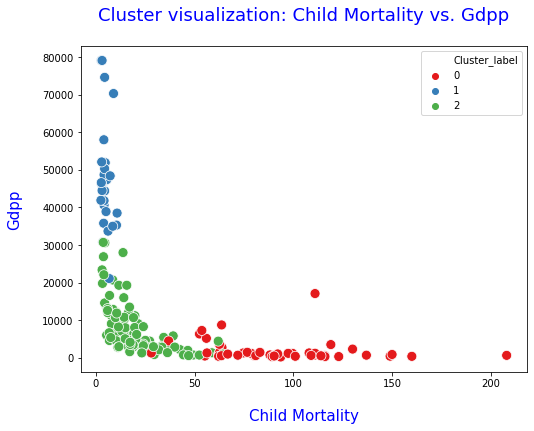

In [110]:
# Calling custom function for plotting the cluster with respect to columns 'Child Mortality', 'gdpp'

visualise_cluster('child mortality','gdpp')

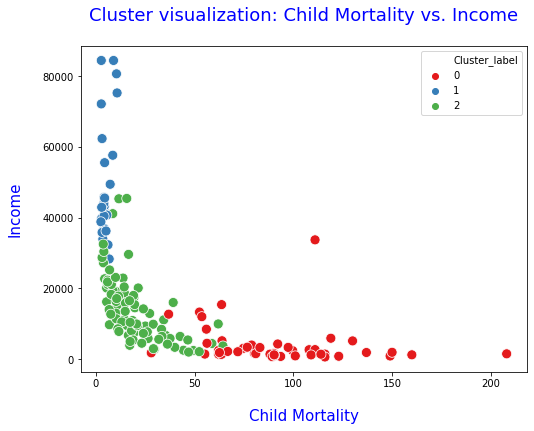

In [111]:
# Calling custom function for plotting the cluster with respect to columns 'Child Mortality', 'Income'

visualise_cluster('child mortality','income')

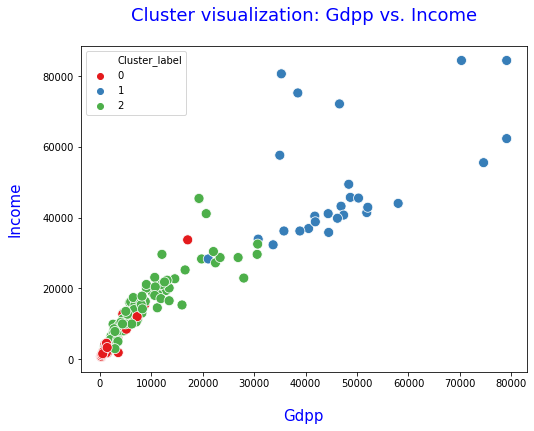

In [112]:
# Calling custom function for plotting the cluster with respect to columns 'gdpp', 'income'

visualise_cluster('gdpp', 'income')

#### Cluster profiling


- Analyse the clusters by comparing how below three variables vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of **under-developed countries.**

    - Child Mortality
    - GDPP
    - Income

In [113]:
# Custom function for calculating mean of different features grouping by clusters

def calc_mean_grpby_cluster(var_list):
    return country_df.groupby('Cluster_label')[var_list].mean()
    

In [114]:
# Custom function for plotting the mean values(Bar plot) of different features across clusters

def BarPlot_mean_grpby_cluster(feature_list):
    
    # Plotting Bar graph of mean values of grouped data
    country_df.groupby('Cluster_label')[feature_list].mean().plot.bar(figsize = (8,5))
    
    # Setting y scale
    plt.yscale('log')
    
    # Setting x- axis and y- axis labels
    plt.ylabel("Avg. value (log)",fontdict={'fontsize' : 15, 'fontweight' : 3, 'color' : 'Blue'}, labelpad = 20) 
    plt.xlabel("Cluster labels",fontdict={'fontsize' : 15, 'fontweight' : 3, 'color' : 'Blue'}, labelpad = 20) 
    
    # Setting title for the bar plot
    plt.title('Avg. value of variables across clusters', fontdict={'fontsize' : 18, 'fontweight' : 5, 'color' : 'Blue'},pad=25) 
    
    # Display plot using matplotlib.pyplot show() function
    plt.show()

In [115]:
# Custom function to analysis clusters for different features using box plot


def feature_cluster_boxplt(features, num_rows, num_cols):
    
    # Setting the figure size
    plt.figure(figsize = (35,18))
    
  
    # Looping through the features for cluster analysis
    for columns in enumerate(features):
        
        # Initialize the subplot
        plt.subplot(num_rows,num_cols,columns[0]+1)
        
        # Ploting the box plot using seaborn library
        sns.boxplot(x = 'Cluster_label', y = columns[1], data = country_df)
        
        # Setting X- axis and y- axis display zize
        plt.xticks(fontsize = 18)
        plt.yticks(fontsize = 18)
        
        # Setting axis labels
        plt.ylabel(columns[1].title(),fontsize = 22, color = 'blue', labelpad = 12)
        plt.xlabel('Cluster Labels',fontsize = 22, color = 'blue', labelpad = 15)
    
        
    # Display plot using matplotlib.pyplot show() function
    plt.show()   

In [116]:
# Calling custom function for finding mean of different features grouping by clusters

calc_mean_grpby_cluster(['child mortality', 'income', 'gdpp'])


,child mortality,income,gdpp
Cluster_label,,,
0,91.610417,3897.354167,1909.208333
1,5.092593,49057.333333,47476.888889
2,20.177174,14169.456522,8226.869565


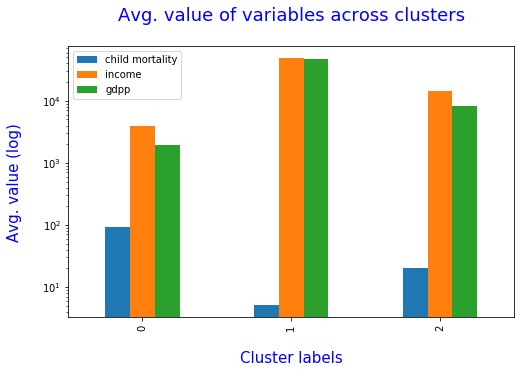

In [117]:
# Calling custom function for plotting the mean values different features across clusters

# features to be analyzed: 'child mortality', 'income', 'gdpp'

BarPlot_mean_grpby_cluster(['child mortality', 'income', 'gdpp'])


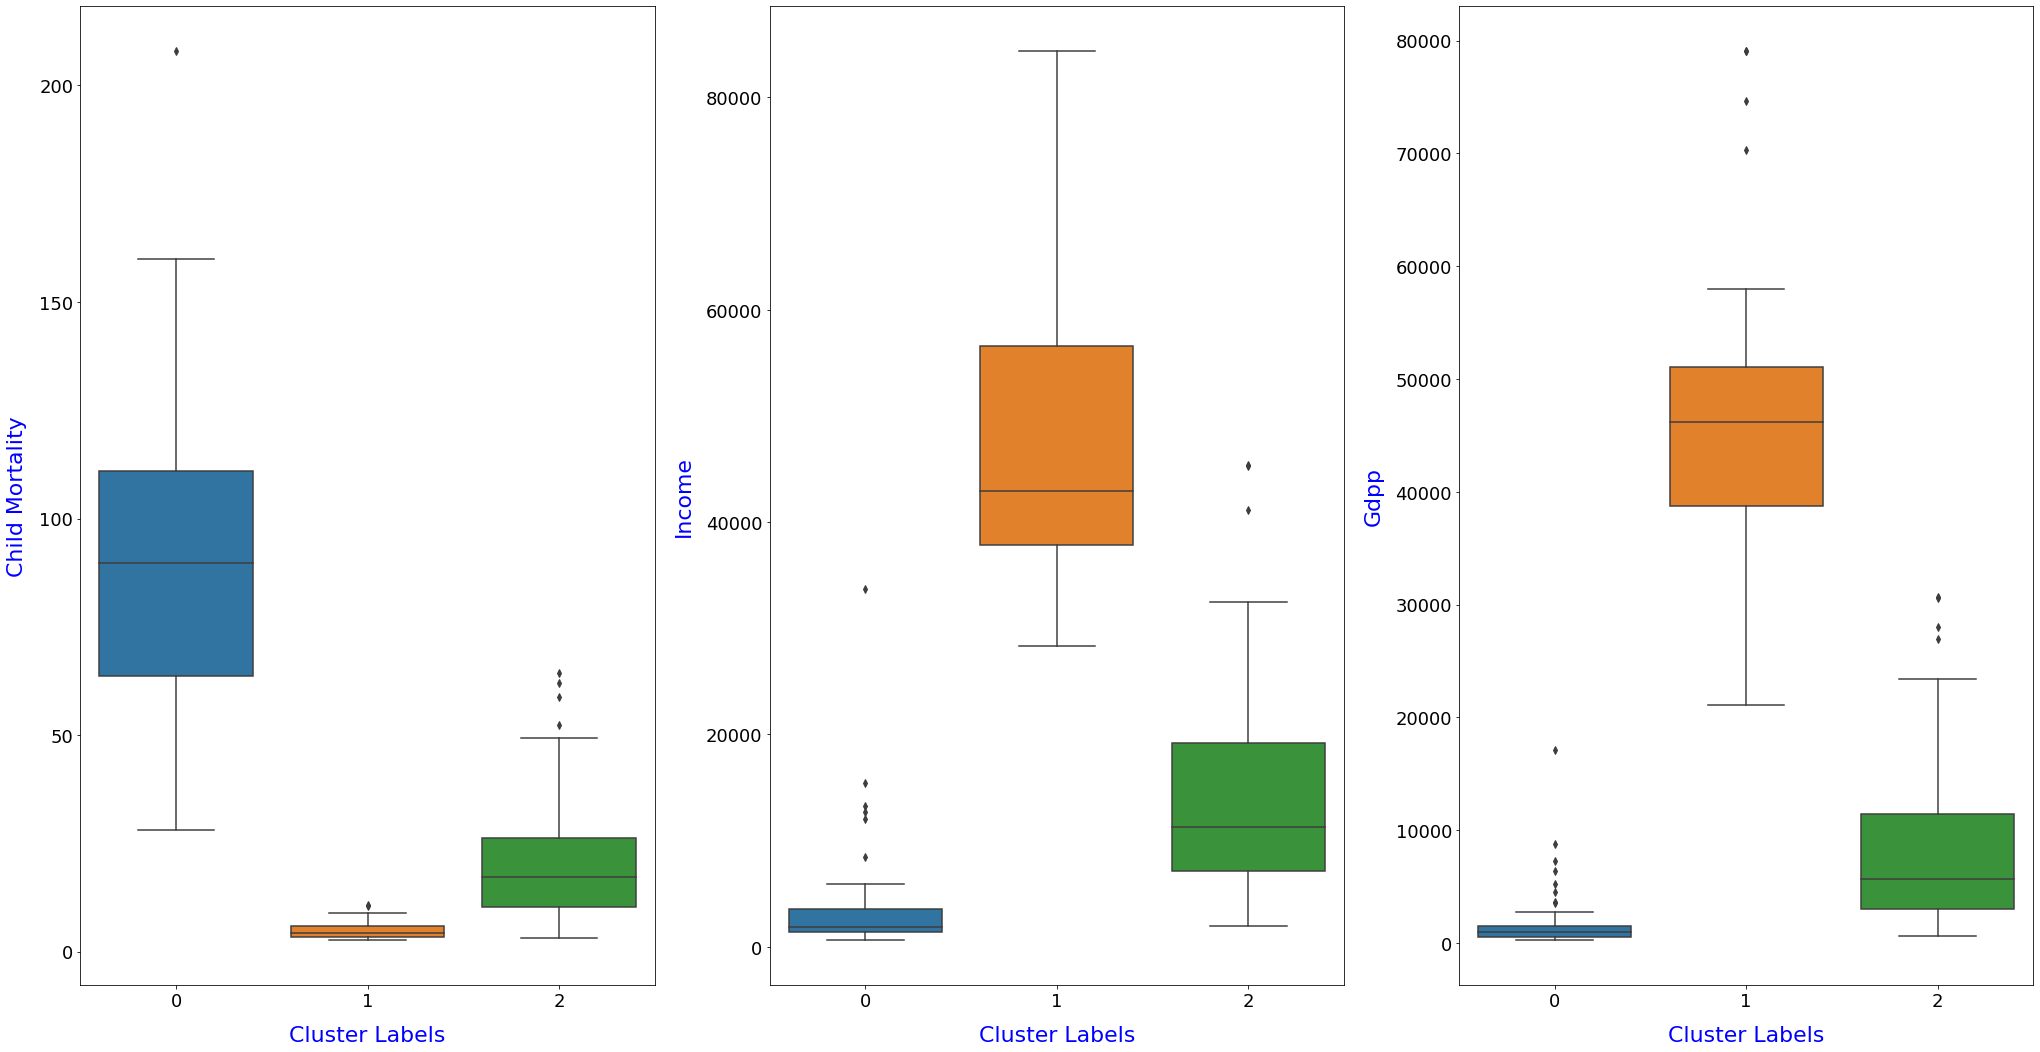

In [118]:
# Calling custom function to analysis clusters for different features using box plot

# features to be analyzed: 'child mortality', 'income', 'gdpp'

feature_cluster_boxplt(['child mortality', 'income', 'gdpp'], 1, 3)


#### Inference:


- From above plot, we can see that **Cluster 0** is having `Low GDPP`, `Low Income` and `High Child Mortality rate`. Hence, this segment can be clustered as **Under developed countries** and need financial aids from NGO.


- We can also see that **Cluster 2** is having **better** `GDPP`, `Income` and `Child Mortality rate` than **cluster 0**, but **worst than cluster 1**. Hence, we can clustered this segment of countries as **Developing Countries**.


- As **Cluster 1** is having `High GDPP`, `High Income` and `Low Child Mortality rate`. Hence, this segment can be clustered as **Developed countries**.

#### Country Identification

- Based on the analysis, finding the `top-10 countries` that are actually in the requirement of the AID

    - Identified countries based on below features
        - Low **GDPP**
        - Low **Income** 
        - High **Child Mortality rate**

In [119]:
#  Find out the top-10 countries that are actually in the requirement of the AID

# Creating new DataFrame with 'Under developed' cluster identify based on 'child mortality', 'income' and 'gdpp'
Cluster_0_df = country_df[country_df['Cluster_label'] == 0]

# Features based on which we will identify the needing country
sorted_by = ['gdpp', 'child mortality', 'income']

# Sort by the required features
Cluster_0_df.sort_values(by = sorted_by, ascending = [True, False, True], inplace = True)

# Displaying top-10 countries having requirement for aid
Cluster_0_df[['country', 'gdpp', 'child mortality', 'income']].head(10)

,country,gdpp,child mortality,income
26,Burundi,231.0,93.6,764.0
88,Liberia,327.0,89.3,700.0
37,"Congo, Dem. Rep.",334.0,116.0,609.0
112,Niger,348.0,123.0,814.0
132,Sierra Leone,399.0,160.0,1220.0
93,Madagascar,413.0,62.2,1390.0
106,Mozambique,419.0,101.0,918.0
31,Central African Republic,446.0,149.0,888.0
94,Malawi,459.0,90.5,1030.0
50,Eritrea,482.0,55.2,1420.0


#### Inference:

Top 10 Country Identified based on **gdpp, child mortality and income** features using `K-Means` clustering


**1.** Burundi

**2.** Liberia

**3.** Congo, Dem. Rep.

**4.** Niger

**5.** Sierra Leone

**6.** Madagascar

**7.** Mozambique

**8.** Central African Republic

**9.** Malawi

**10.** Eritrea

#### Cluster profiling : Based on socio-economic and health factors

- Cluster profiling based on some **socio-economic and health factors**
    - Health
    - Imports
    - Exports
    - Inflation

In [120]:
# Calling custom function for finding mean of different features grouping by clusters

# features to be analyzed: 'health', 'imports', 'exports' and 'inflation'

calc_mean_grpby_cluster(['health', 'imports', 'exports', 'inflation'])


,health,imports,exports,inflation
Cluster_label,,,,
0,114.821765,827.028771,879.063521,11.911146
1,4363.327807,22045.851111,26440.026667,3.120407
2,573.165330,3759.545881,3650.066288,6.995435


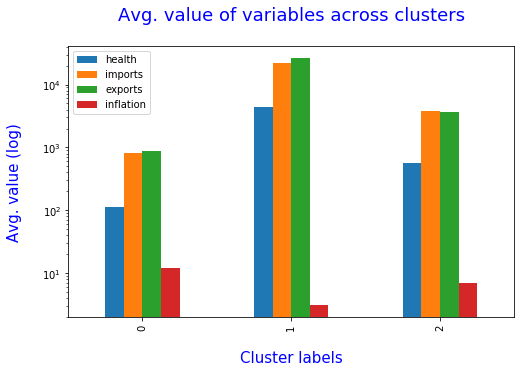

In [121]:
# Calling custom function for plotting the mean values of different features across clusters

# features to be analyzed: 'health', 'imports', 'exports' and 'inflation'

BarPlot_mean_grpby_cluster(['health', 'imports', 'exports', 'inflation'])


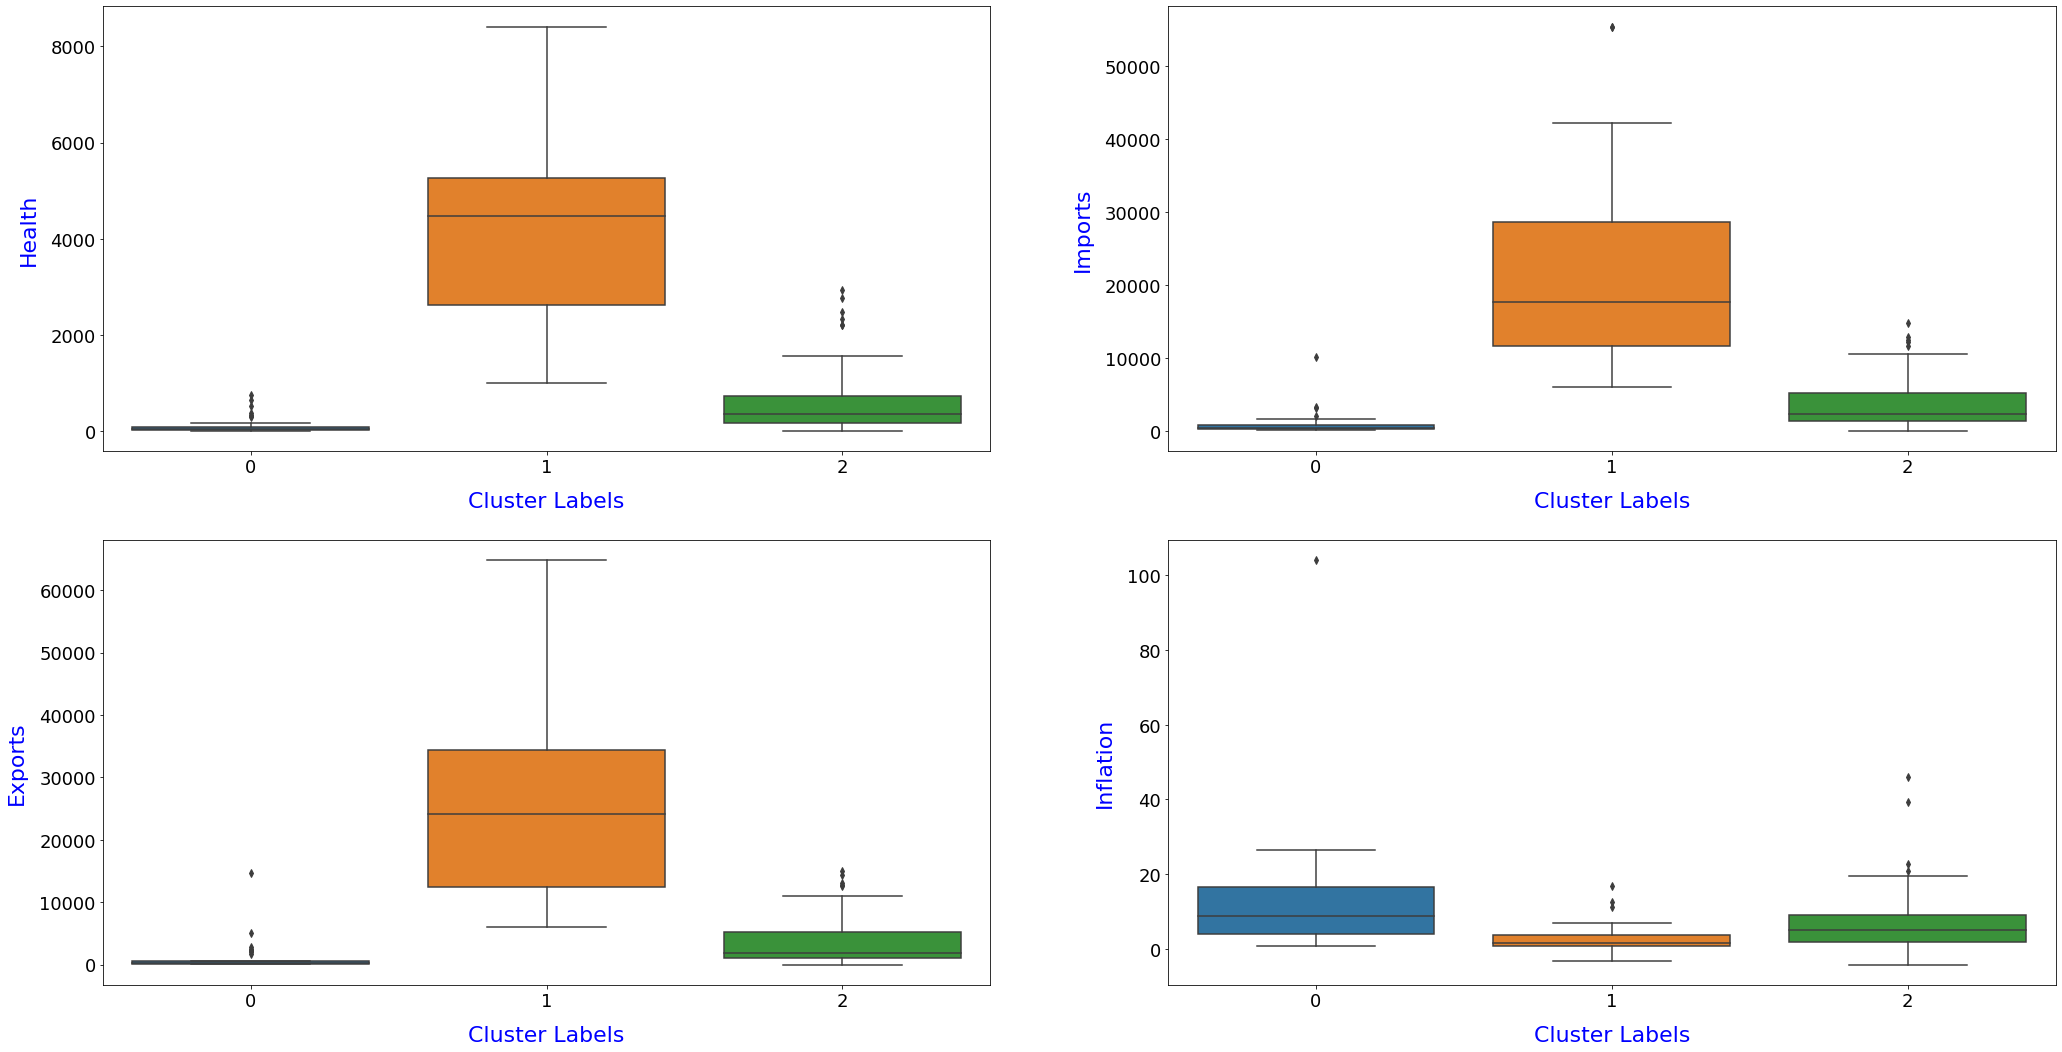

In [122]:
# Calling custom function to analysis clusters for different features using box plot

# features to be analyzed: 'health', 'imports', 'exports' and 'inflation'

feature_cluster_boxplt(['health', 'imports', 'exports', 'inflation'], 2, 2)


#### Inference:


- From above plot, we can see that **Cluster 0** is having `Low Health spent`, `Low Imports of goods and services`, `Low Exports of goods and services` and `High Inflation`. Hence, this segment can be clustered as **Under developed countries** and need financial aids from NGO.


- We can also see that **Cluster 2** is having **better** `Health spent`, `Imports of goods and services`, `Exports of goods and services` and `Inflation` than **cluster 0**, but **worst than cluster 1**. Hence, we can clustered this segment of countries as **Developing Countries**.


- As **Cluster 1** is having `High Health spent`, `High Imports and Exports of goods and services` and `Low Inflation`. Hence, this segment can be clustered as **Developed countries**.

#### Country Identification : Based on some socio-economic and health factors

- Finding the `top-10 countries` that are actually in the requirement of the AID based on some socio-economic and health factors.

    - Identified countries based on below features
        - Low **Health spent**
        - Low **Imports of goods and services**
        - Low **Exports of goods and services**
        - High **Inflation**


In [123]:
#  Find out the top-10 countries that are actually in the requirement of the AID based on socio-economic factors

# Creating new DataFrame with 'Under developed' cluster identified based on socio-economic factors
SocioEco_Cluster_0_df = country_df[country_df['Cluster_label'] == 0]

# Features based on which we will identify the needing country
sorted_by_val = ['exports', 'imports', 'inflation', 'health']

# Sort by the required features
SocioEco_Cluster_0_df.sort_values(by = sorted_by_val, ascending = [True, True, False, True], inplace = True)

# Displaying top-10 countries having requirement for aid
SocioEco_Cluster_0_df[['country', 'exports', 'imports', 'inflation', 'health']].head(10)

,country,exports,imports,inflation,health
26,Burundi,20.6052,90.552,12.30,26.7960
50,Eritrea,23.0878,112.306,11.60,12.8212
31,Central African Republic,52.6280,118.190,2.01,17.7508
0,Afghanistan,55.3000,248.297,9.44,41.9174
88,Liberia,62.4570,302.802,5.47,38.5860
132,Sierra Leone,67.0320,137.655,17.20,52.2690
126,Rwanda,67.5600,168.900,2.61,59.1150
112,Niger,77.2560,170.868,2.55,17.9568
149,Timor-Leste,79.2000,1000.800,26.50,328.3200
64,Guinea-Bissau,81.5030,192.544,2.97,46.4950


#### Inference:

Top 10 Country Identified based on **exports, imports, inflation and health** features using `K-Means` clustering


**1.** Burundi
	   
**2.** Eritrea
	   
**3.** Central African Republic
	   
**4.** Afghanistan
	   
**5.** Liberia
	   
**6.** Sierra Leone
	   
**7.** Rwanda
	   
**8.** Niger
	   
**9.** Timor-Leste
	   
**10.** Guinea-Bissau

### Perform Hierarchical Clustering

### Use Single and Complete linkage

In [124]:
# Checking original DataFrame before proceeding with hierarchical clustering

country_df.head()


,country,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp,Cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [125]:
# Custom function to return linkage matrix for dendogram


def linkage_func(linkage_type):
    
    # Setting figure size
    plt.figure(figsize = (12,7))
    
    # Using single linkage to merge cluster
    merging_clusters = linkage(scalled_df, method = linkage_type, metric = 'euclidean')
    
    
    # Setting title for dendogram
    plt.title('Dendogram using '+ linkage_type.title() + ' Linkage', fontsize = 18, color = 'blue', pad = 25)
    
    
    # Returning linkage matrix
    return merging_clusters


#### Plotting dendogram using `Single linkage`

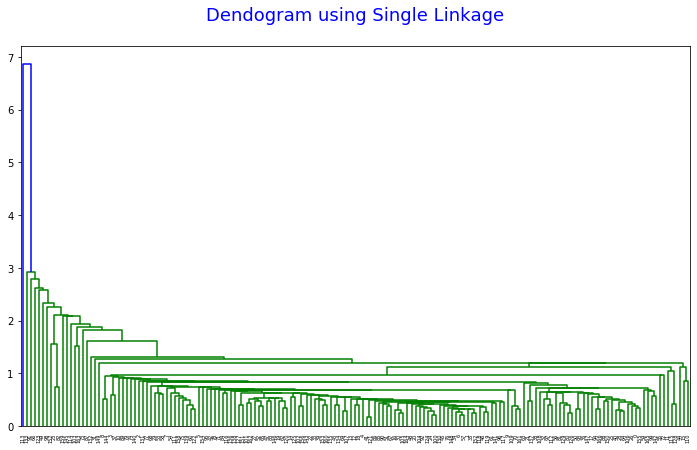

In [126]:
# Calling custom function for plotting dendogram using single linkage

# Linkage Type: Single

merging_single_cluster = linkage_func('single')

# Creating dendogram
dendrogram(merging_single_cluster)

# Displaying dendogram using matplotlib.pyplot show() method
plt.show()

#### Plotting dendogram using `Complete linkage`

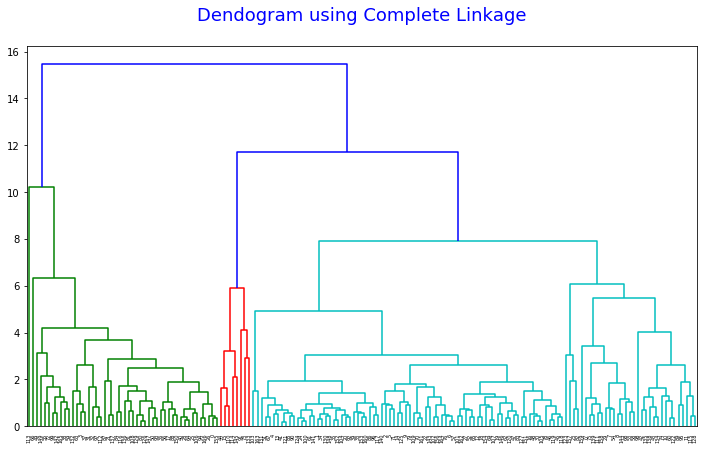

In [127]:
# Calling custom function for plotting dendogram using complete linkage

# Linkage Type: Complete

merging_complete_cluster = linkage_func('complete')

# Creating dendogram
dendrogram(merging_complete_cluster)

# Displaying dendogram using matplotlib.pyplot show() method
plt.show()

#### Inference:

- From the above Dendrograms, it is evident that **`'Complete Linkage'`** give a better cluster formation. So we will use `Complete linkage` output for our further analysis.  

In [128]:
# Cutting the dendogram with cluster(k) as 3

hier_cluster_label = cut_tree(merging_complete_cluster, n_clusters=3).reshape(-1,)

# Displaying the cluster labels obtained from hierarchical clustering
hier_cluster_label

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [129]:
# Assigning the cluster labels found from Hierarchical clustering in the Original DataFrame

country_df['Cluster_label'] = hier_cluster_label

# Displaying top 5 rows of Original DataFrame
country_df.head()

,country,child mortality,exports,health,imports,income,inflation,life expectancy,total fertility,gdpp,Cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


#### Check Data Distribution among Clusters

---------------------------------
1    111
0     48
2      8
Name: Cluster_label, dtype: int64
---------------------------------



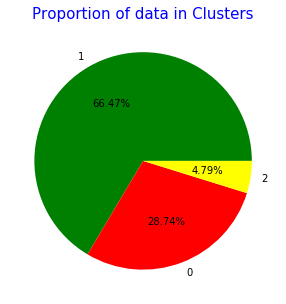

In [130]:
# Calling custom function to check the number of Data Points in each cluster

datapoint_distribution()

- `Data distribution seems goods among three clusters`. Hence, we can proceed with visualization and Cluster profiling

#### Hierarchical Clustering: Visualize the clusters

- Plotting the cluster with respect to the data columns

    - Child Mortality
    - GDPP
    - Income


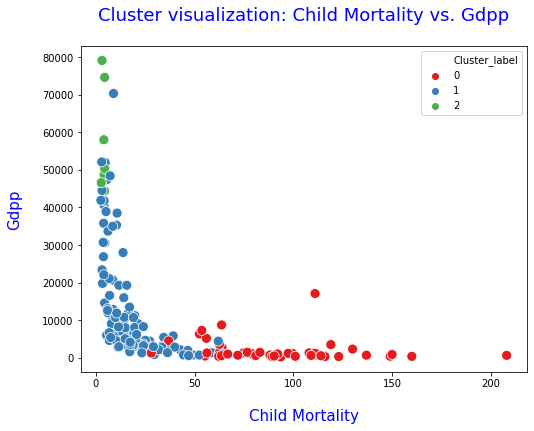

In [131]:
# Calling custom function for plotting the cluster with respect to columns 'Child Mortality', 'gdpp'

visualise_cluster('child mortality','gdpp')

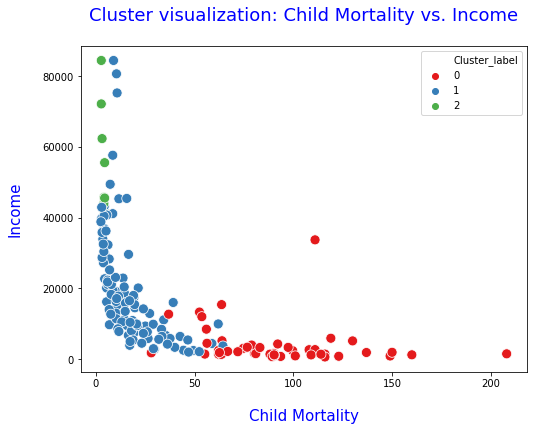

In [132]:
# Calling custom function for plotting the cluster with respect to columns 'Child Mortality', 'Income'

visualise_cluster('child mortality','income')

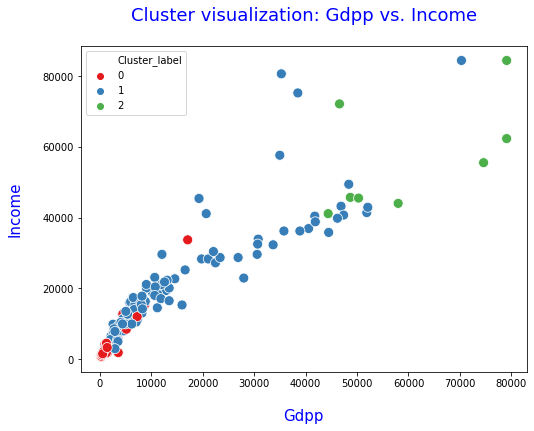

In [133]:
# Calling custom function for plotting the cluster with respect to columns 'gdpp', 'income'

visualise_cluster('gdpp', 'income')

#### Cluster profiling


- Analyse the clusters by comparing how below three variables vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of **under-developed countries.**

    - Child Mortality
    - GDPP
    - Income

In [134]:
# Calling custom function for finding mean of different features grouping by clusters

calc_mean_grpby_cluster(['child mortality', 'income', 'gdpp'])


,child mortality,income,gdpp
Cluster_label,,,
0,91.610417,3897.354167,1909.208333
1,17.686486,19617.693694,14035.783784
2,3.825000,56321.750000,60097.000000


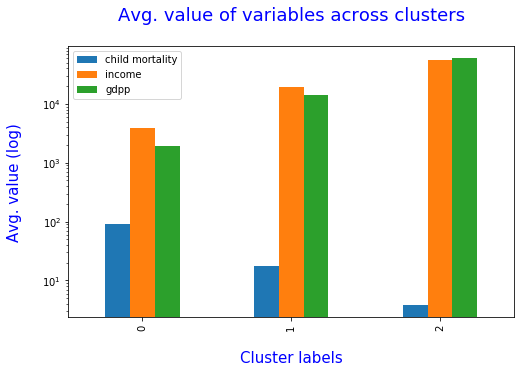

In [135]:
# Calling custom function for plotting the mean values different features across clusters

# features to be analyzed: 'child mortality', 'income', 'gdpp'

BarPlot_mean_grpby_cluster(['child mortality', 'income', 'gdpp'])


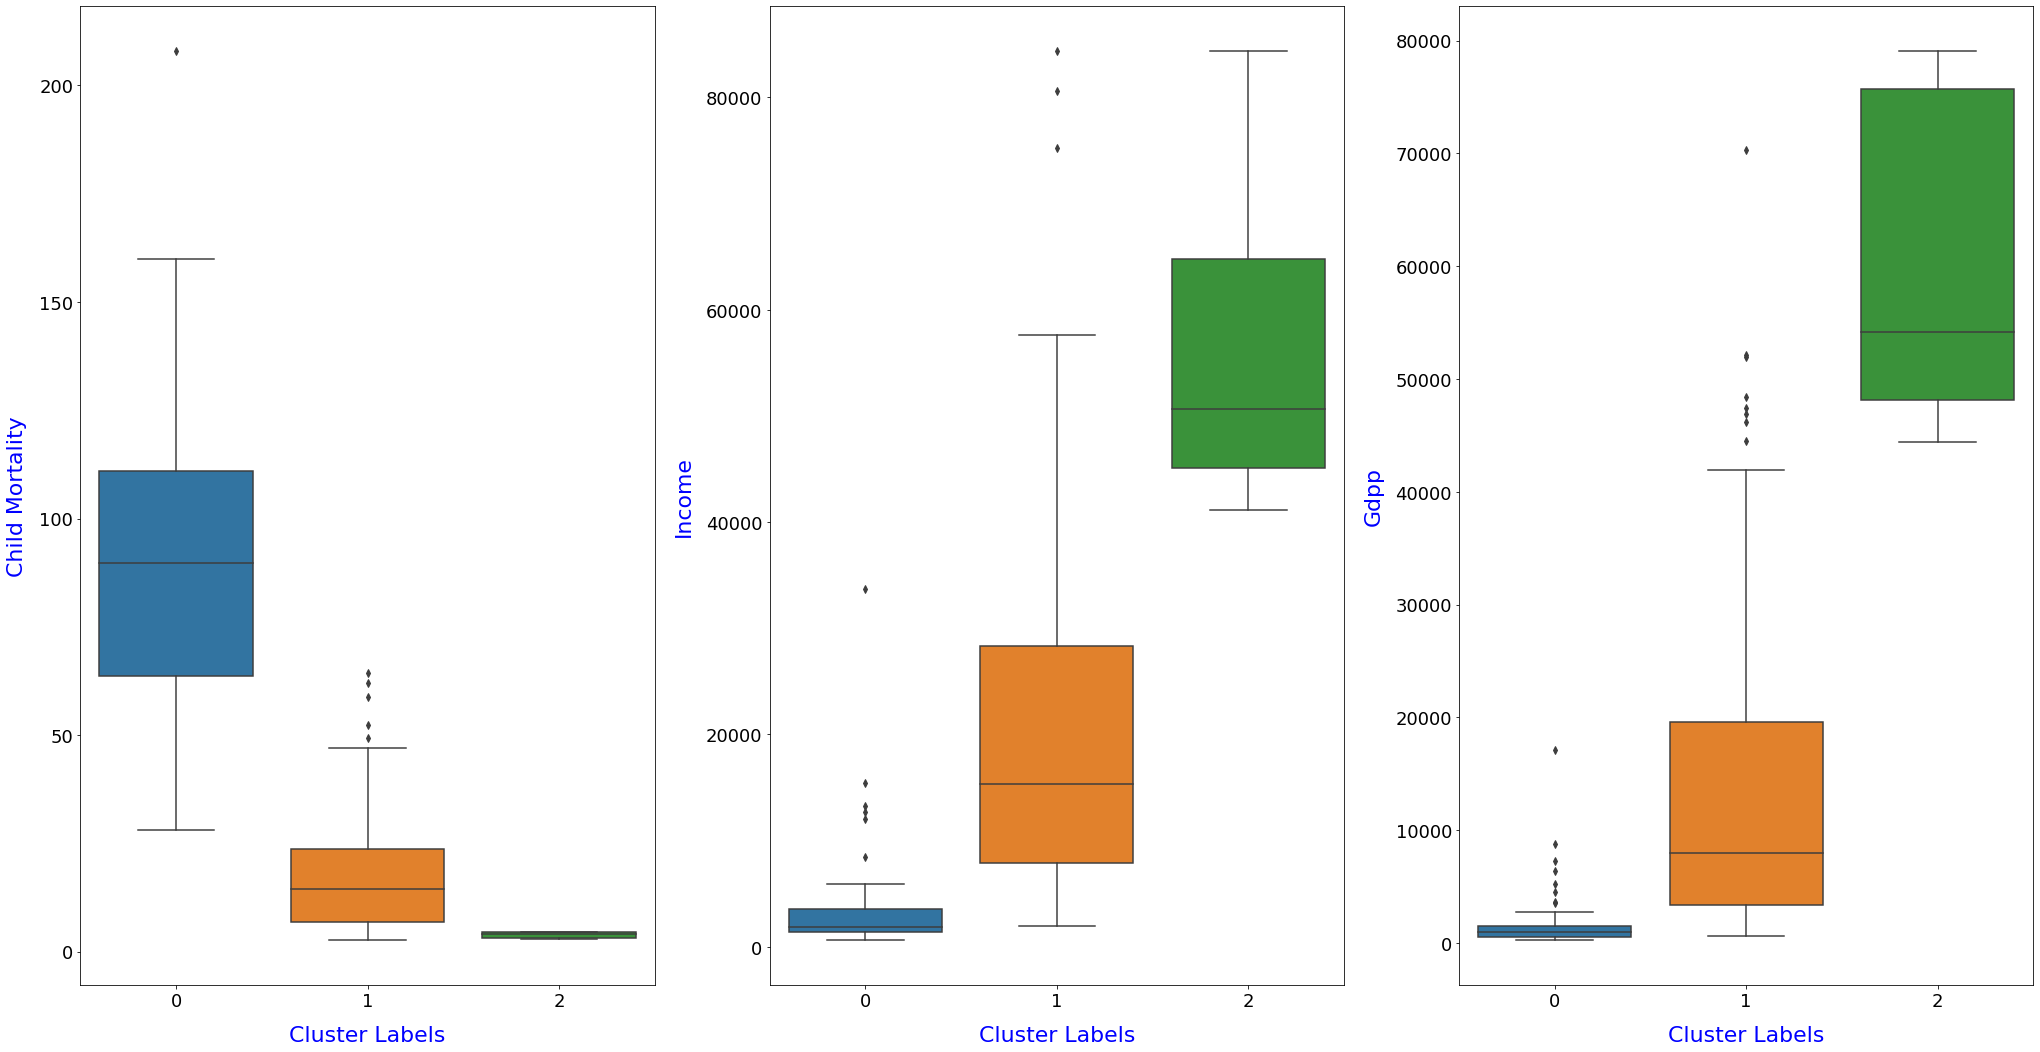

In [136]:
# Calling custom function to analysis clusters for different features using box plot

# features to be analyzed: 'child mortality', 'income', 'gdpp'

feature_cluster_boxplt(['child mortality', 'income', 'gdpp'], 1, 3)


#### Inference:


- From above plot, we can see that **Cluster 0** is having `Low GDPP`, `Low Income` and `High Child Mortality rate`. Hence, this segment can be clustered as **Under developed countries** and need financial aids from NGO.


- We can also see that **Cluster 2** is having **better** `GDPP`, `Income` and `Child Mortality rate` than **cluster 0**, but **worst than cluster 1**. Hence, we can clustered this segment of countries as **Developing Countries**.


- As **Cluster 1** is having `High GDPP`, `High Income` and `Low Child Mortality rate`. Hence, this segment can be clustered as **Developed countries**.

#### Country Identification

- Based on the analysis, finding the `top-10 countries` that are actually in the requirement of the AID

    - Identified countries based on below features
        - Low **GDPP**
        - Low **Income** 
        - High **Child Mortality rate**

In [137]:
#  Find out the top-10 countries that are actually in the requirement of the AID

# Creating new DataFrame with 'Under developed' cluster identify based on 'child mortality', 'income' and 'gdpp'
Cluster_0_df = country_df[country_df['Cluster_label'] == 0]

# Features based on which we will identify the needing country
sorted_by = ['gdpp', 'child mortality', 'income']

# Sort by the required features
Cluster_0_df.sort_values(by = sorted_by, ascending = [True, False, True], inplace = True)

# Displaying top-10 countries having requirement for aid
Cluster_0_df[['country', 'gdpp', 'child mortality', 'income']].head(10)

,country,gdpp,child mortality,income
26,Burundi,231.0,93.6,764.0
88,Liberia,327.0,89.3,700.0
37,"Congo, Dem. Rep.",334.0,116.0,609.0
112,Niger,348.0,123.0,814.0
132,Sierra Leone,399.0,160.0,1220.0
93,Madagascar,413.0,62.2,1390.0
106,Mozambique,419.0,101.0,918.0
31,Central African Republic,446.0,149.0,888.0
94,Malawi,459.0,90.5,1030.0
50,Eritrea,482.0,55.2,1420.0


#### Inference:

Top 10 Country Identified based on **gdpp, child mortality and income** features using `Hierarchical` clustering


**1.** Burundi

**2.** Liberia

**3.** Congo, Dem. Rep.

**4.** Niger

**5.** Sierra Leone

**6.** Madagascar

**7.** Mozambique

**8.** Central African Republic

**9.** Malawi

**10.** Eritrea

#### Cluster profiling : Based on socio-economic and health factors

- Cluster profiling based on some **socio-economic and health factors**
    - Health
    - Imports
    - Exports
    - Inflation

In [138]:
# Calling custom function for finding mean of different features grouping by clusters

# features to be analyzed: 'health', 'imports', 'exports' and 'inflation'

calc_mean_grpby_cluster(['health', 'imports', 'exports', 'inflation'])


,health,imports,exports,inflation
Cluster_label,,,,
0,114.821765,827.028771,879.063521,11.911146
1,1098.913521,5702.860550,6197.379266,6.443802
2,6070.207550,38512.335000,45222.215000,1.571125


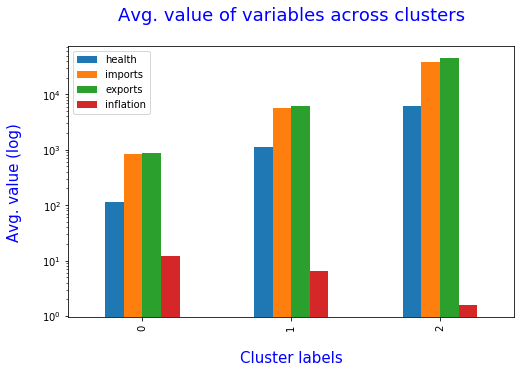

In [139]:
# Calling custom function for plotting the mean values of different features across clusters

# features to be analyzed: 'health', 'imports', 'exports' and 'inflation'

BarPlot_mean_grpby_cluster(['health', 'imports', 'exports', 'inflation'])


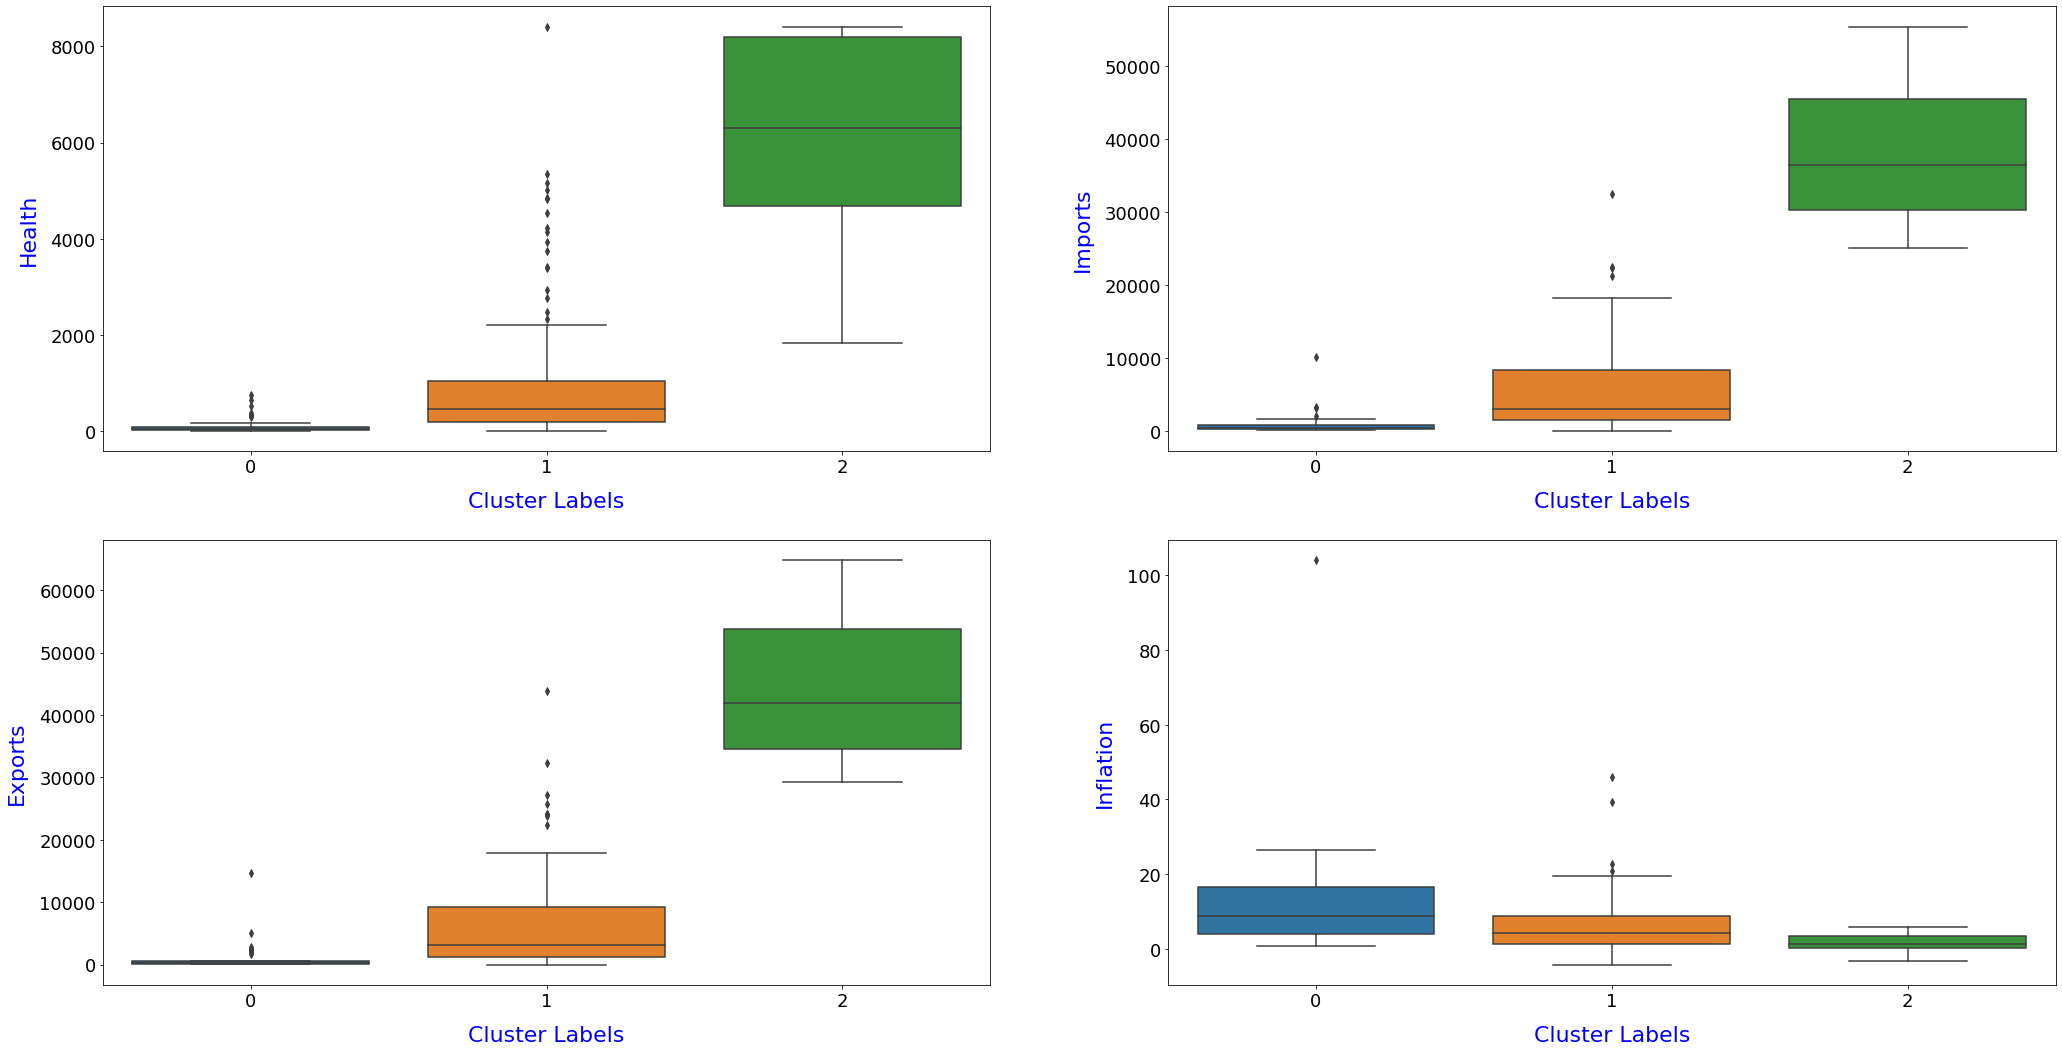

In [140]:
# Calling custom function to analysis clusters for different features using box plot

# features to be analyzed: 'health', 'imports', 'exports' and 'inflation'

feature_cluster_boxplt(['health', 'imports', 'exports', 'inflation'], 2, 2)


#### Inference:


- From above plot, we can see that **Cluster 0** is having `Low Health spent`, `Low Imports of goods and services`, `Low Exports of goods and services` and `High Inflation`. Hence, this segment can be clustered as **Under developed countries** and need financial aids from NGO.


- We can also see that **Cluster 2** is having **better** `Health spent`, `Imports of goods and services`, `Exports of goods and services` and `Inflation` than **cluster 0**, but **worst than cluster 1**. Hence, we can clustered this segment of countries as **Developing Countries**.


- As **Cluster 1** is having `High Health spent`, `High Imports and Exports of goods and services` and `Low Inflation`. Hence, this segment can be clustered as **Developed countries**.

#### Country Identification : Based on some socio-economic and health factors

- Finding the `top-10 countries` that are actually in the requirement of the AID based on **some socio-economic and health factors.**

    - Identified countries based on below features
        - Low **Health spent**
        - Low **Imports of goods and services**
        - Low **Exports of goods and services**
        - High **Inflation**


In [141]:
#  Find out the top-10 countries that are actually in the requirement of the AID based on socio-economic factors

# Creating new DataFrame with 'Under developed' cluster identified based on socio-economic factors
SocioEco_Cluster_0_df = country_df[country_df['Cluster_label'] == 0]

# Features based on which we will identify the needing country
sorted_by_val = ['exports', 'imports', 'inflation', 'health']

# Sort by the required features
SocioEco_Cluster_0_df.sort_values(by = sorted_by_val, ascending = [True, True, False, True], inplace = True)

# Displaying top-10 countries having requirement for aid
SocioEco_Cluster_0_df[['country', 'exports', 'imports', 'inflation', 'health']].head(10)

,country,exports,imports,inflation,health
26,Burundi,20.6052,90.552,12.30,26.7960
50,Eritrea,23.0878,112.306,11.60,12.8212
31,Central African Republic,52.6280,118.190,2.01,17.7508
0,Afghanistan,55.3000,248.297,9.44,41.9174
88,Liberia,62.4570,302.802,5.47,38.5860
132,Sierra Leone,67.0320,137.655,17.20,52.2690
126,Rwanda,67.5600,168.900,2.61,59.1150
112,Niger,77.2560,170.868,2.55,17.9568
149,Timor-Leste,79.2000,1000.800,26.50,328.3200
64,Guinea-Bissau,81.5030,192.544,2.97,46.4950


#### Inference:

Top 10 Country Identified based on **exports, imports, inflation and health** features using `Hierarchical` clustering


**1.** Burundi
	   
**2.** Eritrea
	   
**3.** Central African Republic
	   
**4.** Afghanistan
	   
**5.** Liberia
	   
**6.** Sierra Leone
	   
**7.** Rwanda
	   
**8.** Niger
	   
**9.** Timor-Leste
	   
**10.** Guinea-Bissau

# Conclusion

- Top 10 Countries identified for NGO AID, which are **Under developed** countries, based on **gdpp, child mortality and income** features using both `K-Means` and `Hierarchical` clustering are as follows:


**1.** Burundi

**2.** Liberia

**3.** Congo, Dem. Rep.

**4.** Niger

**5.** Sierra Leone

**6.** Madagascar

**7.** Mozambique

**8.** Central African Republic

**9.** Malawi

**10.** Eritrea





- **Reasons for AID for the above country:**
    - High `Child Mortality`
    - Low `GDPP`
    - Low `Income`

- Top 10 countries identified for NGO AID, which are **Under developed** countries, based on other **socio-economic factors** like **exports, imports, inflation and health** etc. features using both `K-Means` and `Hierarchical` clustering are as follows:


**1.** Burundi
	   
**2.** Eritrea
	   
**3.** Central African Republic
	   
**4.** Afghanistan
	   
**5.** Liberia
	   
**6.** Sierra Leone
	   
**7.** Rwanda
	   
**8.** Niger
	   
**9.** Timor-Leste
	   
**10.** Guinea-Bissau

- **Reasons for AID for the above country:**
    - High `Inflation`
    - Low `Exports and Imports of goods and services`
    - Low `spent on health`

- If we considered **all features, including socio-economic factors**, then below are the list of 6 **Under Developed** countries that needs to be considered for NGO AID.

**1.** Burundi

**2.** Liberia

**3.** Niger

**4.** Central African Republic

**5.** Sierra Leone

**6.** Eritrea
